In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 95% !important; }</style>"))

In [2]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_test

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,0,0,1,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,0,0,7,8,13,4.084249,Сургут,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,3,6,7,0,3,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1
2,Тюмень,-1.0,COL_289318,3,28,67,122,0,0,0,0,0,9,18,34,1.291974,Тюмень,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,0,2,5,0,1,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1
3,Иркутск,1.0,COL_289354,5,76,139,231,0,0,0,0,0,28,52,84,0.914598,Иркутск,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,1,5,5,0,7,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1
4,Курск,NaN,COL_289399,8,105,189,279,0,0,2,9,1,24,40,54,1.300135,Курск,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,4,5,12,0,2,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Красноярск,4.0,COL_455089,0,3,6,16,0,0,0,0,0,1,1,1,3.

### Процент пропуска

In [6]:
missing = round((df_train.isna().sum() / df_train.shape[0]) * 100, 2)
missing[missing > 0]

floor                             62.99
osm_city_nearest_population        0.02
reform_house_population_1000       5.22
reform_house_population_500        9.73
reform_mean_floor_count_1000       5.97
reform_mean_floor_count_500       10.78
reform_mean_year_building_1000     5.80
reform_mean_year_building_500     10.59
street                             0.57
dtype: float64

###   отклонение

In [7]:
round(df_train.std(), 2)

lat                                          4.25
lng                                         17.04
osm_amenity_points_in_0.001                  4.20
osm_amenity_points_in_0.005                 53.29
osm_amenity_points_in_0.0075               105.19
osm_amenity_points_in_0.01                 172.29
osm_building_points_in_0.001                 0.39
osm_building_points_in_0.005                 6.86
osm_building_points_in_0.0075               14.80
osm_building_points_in_0.01                 25.68
osm_catering_points_in_0.001                 1.70
osm_catering_points_in_0.005                17.71
osm_catering_points_in_0.0075               33.27
osm_catering_points_in_0.01                 53.79
osm_city_closest_dist                       34.76
osm_city_nearest_population            4110834.63
osm_crossing_closest_dist                    4.01
osm_crossing_points_in_0.001                 1.39
osm_crossing_points_in_0.005                15.14
osm_crossing_points_in_0.0075               30.23


### распределение

In [8]:
df_train.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

<AxesSubplot:>

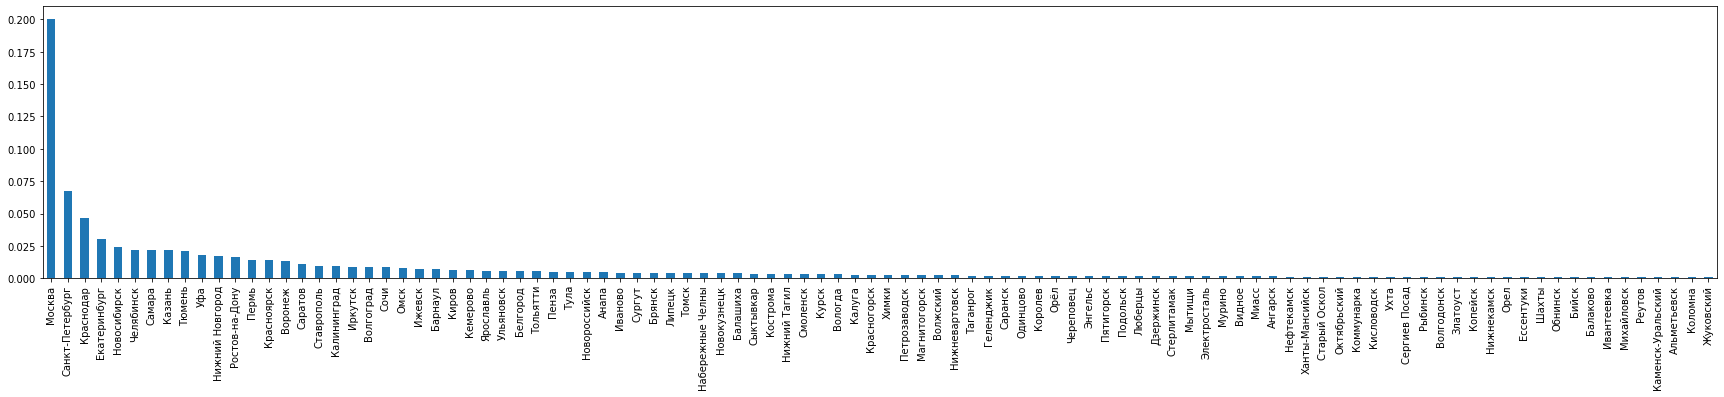

In [9]:
plt.figure(figsize=(30, 5))
cities_distribution = df_train.city.value_counts(normalize=True)[:100]
cities_distribution.plot(kind='bar')

#### этаж
есть мусор типо текста "подвал и пр"

In [9]:
# этаж
df_train.floor.value_counts()

1.0                             70393
2.0                              7750
-1.0                             7738
3.0                              3516
1.0                              2478
4.0                              2194
5.0                              1387
0.0                               893
-2.0                              762
6.0                               673
7.0                               671
1                                 442
2.0                               352
8.0                               340
-1.0                              327
9.0                               302
10.0                              238
11.0                              179
3.0                               166
12.0                              136
15.0                              111
17.0                               99
20.0                               99
22.0                               97
13.0                               97
4.0                                90
16.0        

In [10]:
import re
import numpy as np

# левые строки
df_train.floor = df_train.floor.astype(str)

def qwe(s):
    res = re.findall(pattern, s)
    if res:
        return res[0]
    elif s.lower() in ('подвал', 'техническое подполье'):
        return '-1'
    elif s.lower().startswith('цоколь'):
        return '1'
    elif s.lower() == 'мансарда' or s.lower() == 'мезонин':
        return np.nan
    return s
    
pattern = '.*?(-?\d+).*?'
df_train.floor = df_train.floor.apply(qwe).astype(float)
df_train.floor.isna().sum() / df_train.shape[0]

0.6298964945388003

In [11]:
# левые строки
df_test.floor = df_test.floor.astype(str)
    
pattern = '.*?(-?\d+).*?'
df_test.floor = df_test.floor.apply(qwe).astype(float)
df_test.floor.isna().sum() / df_test.shape[0]

0.4377942165433759

In [12]:
osm = ['osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01',
       'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075',
       'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005',
       'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01',
       'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001',
       'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075',
       'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01', 'osm_subway_closest_dist',
       'osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005',
       'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01',
       'osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005',
       'osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01']

In [13]:
res = plt.figure(figsize=(30, 5))

<Figure size 2160x360 with 0 Axes>

In [14]:
print(res)

Figure(2160x360)


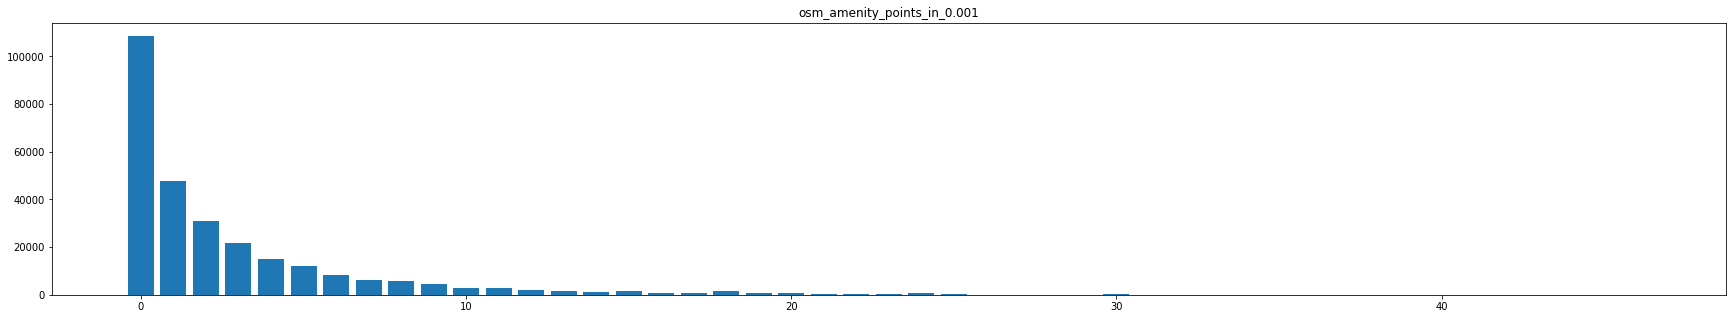

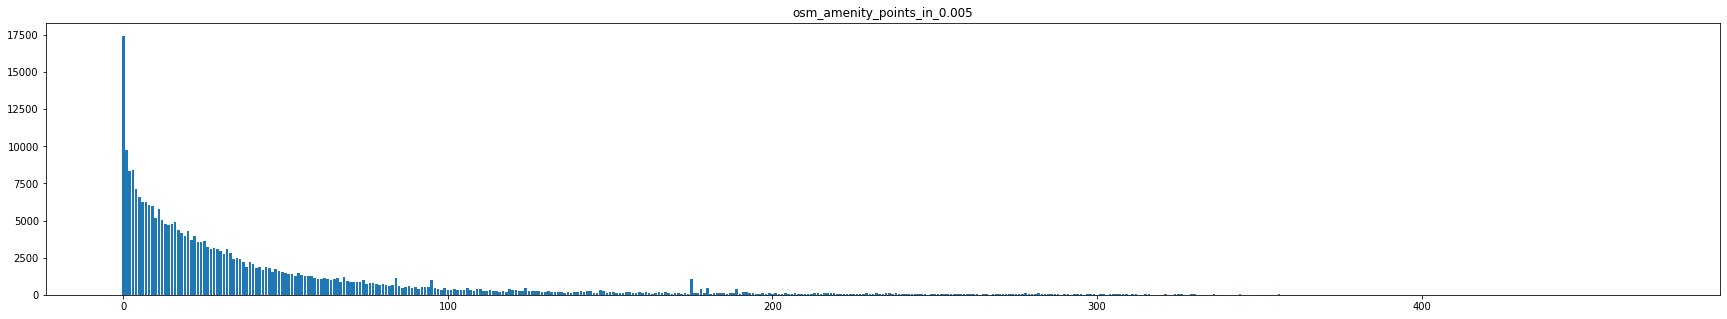

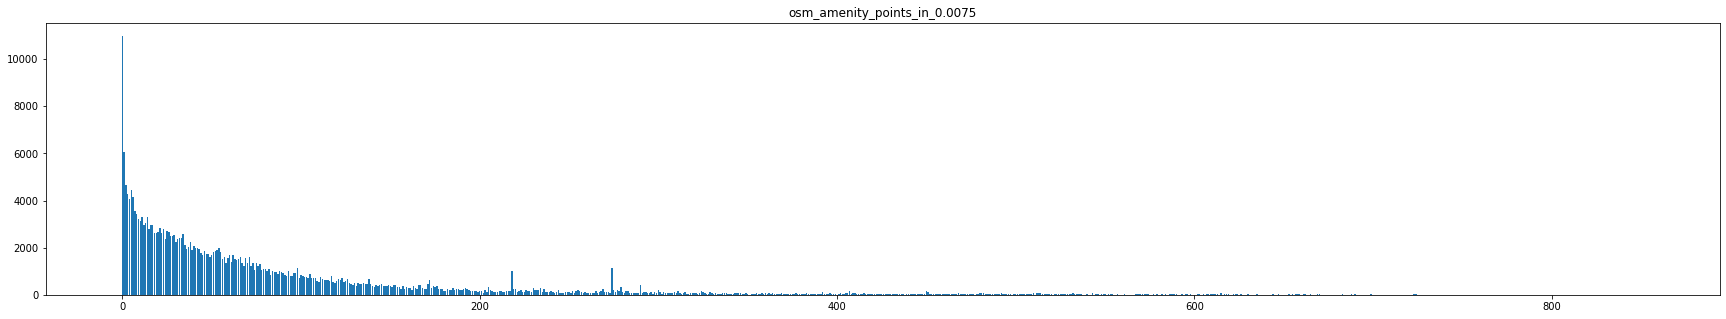

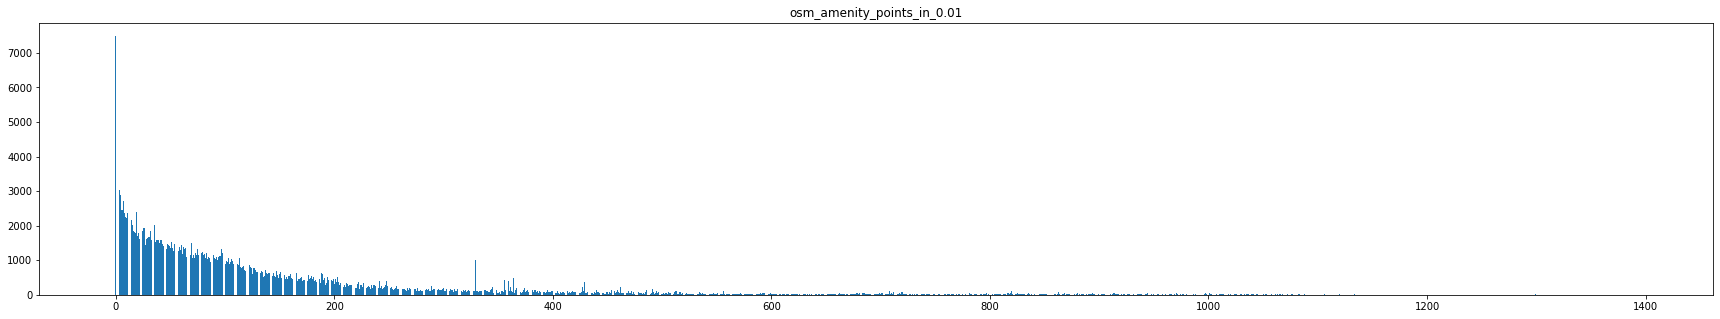

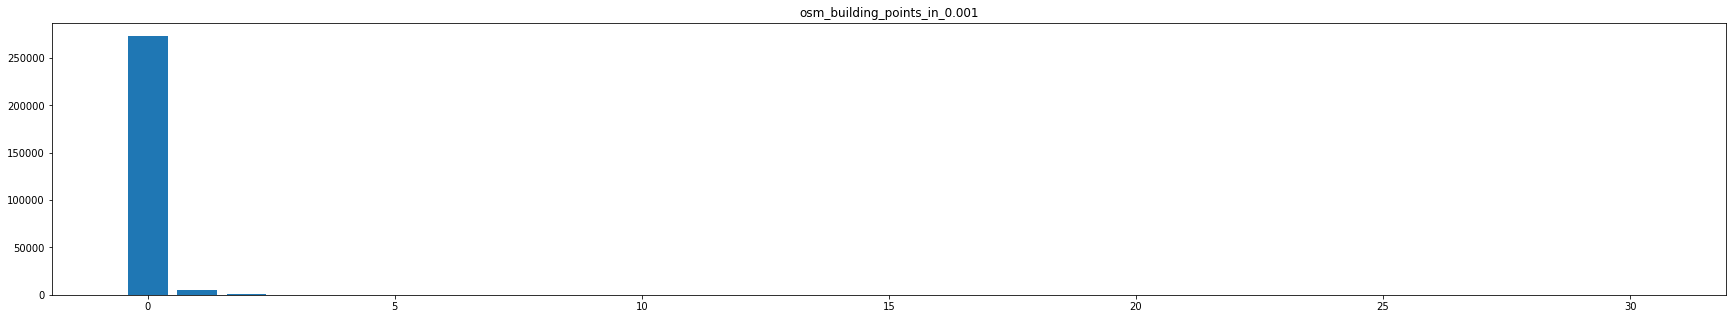

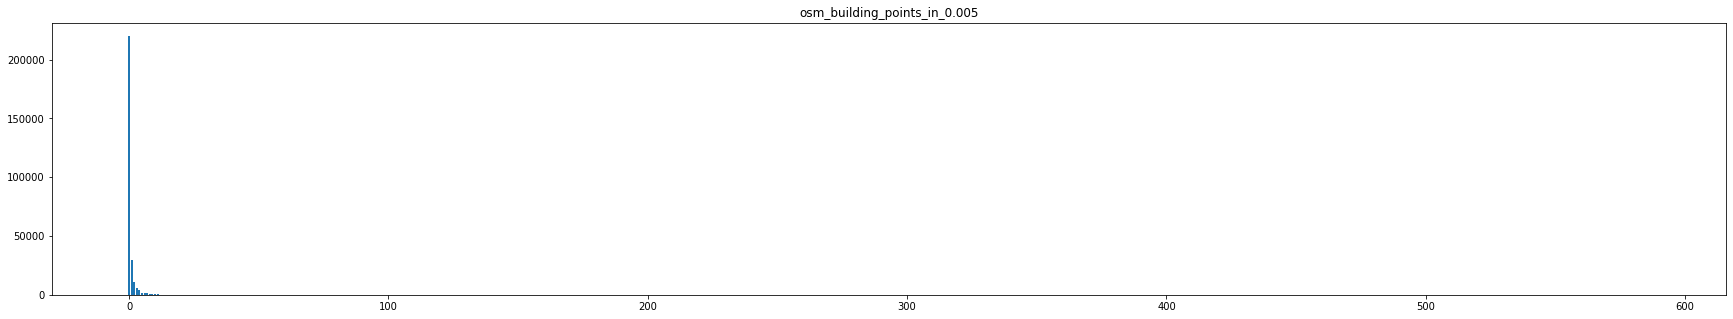

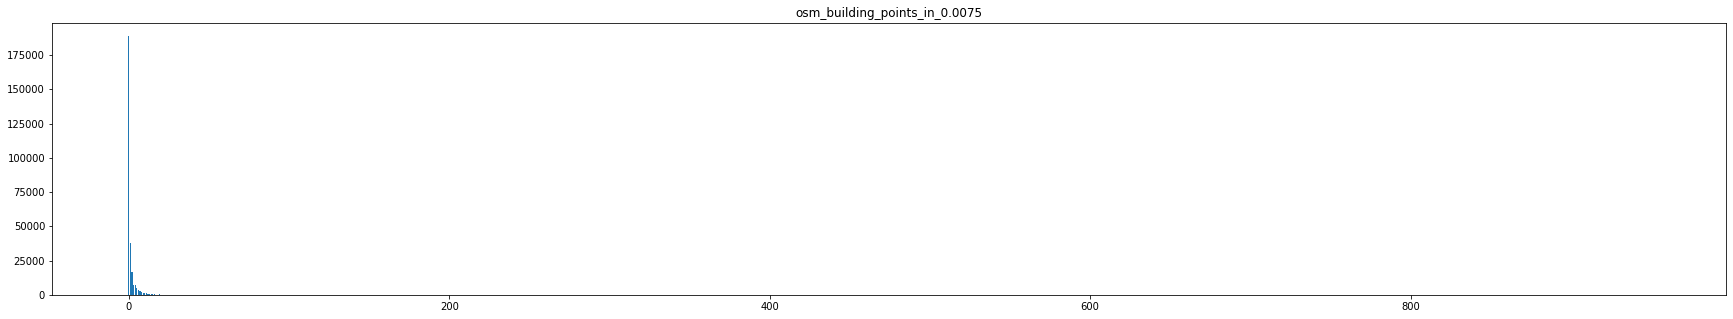

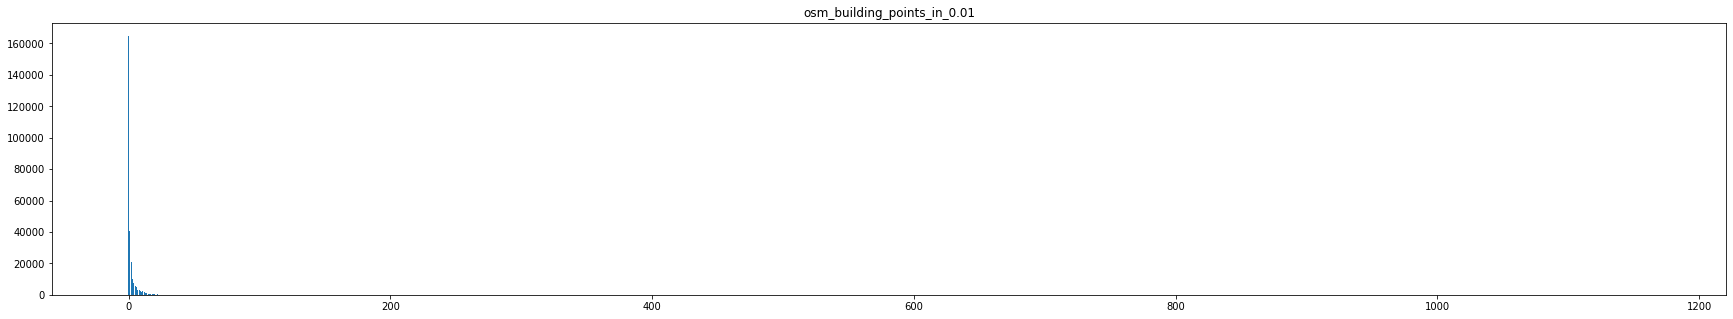

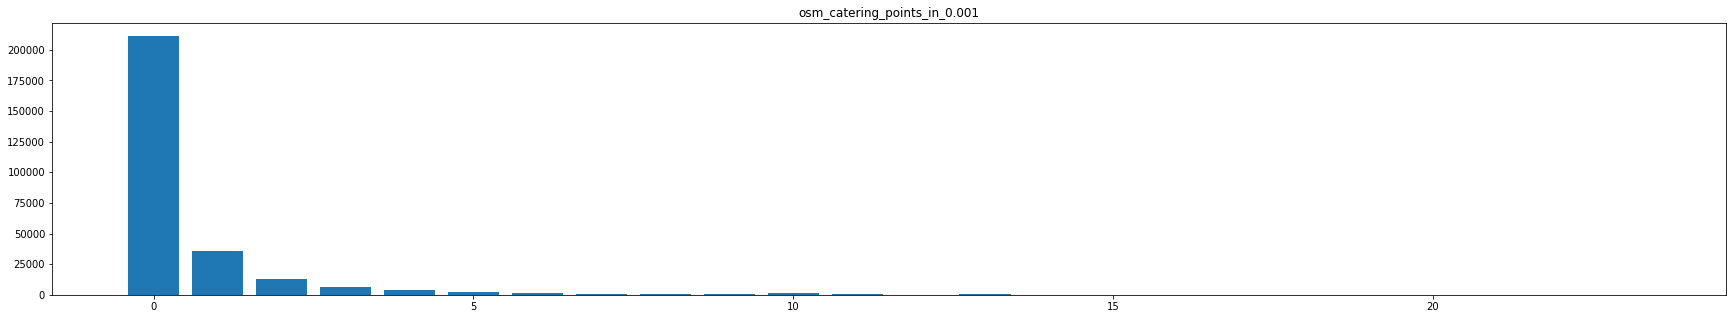

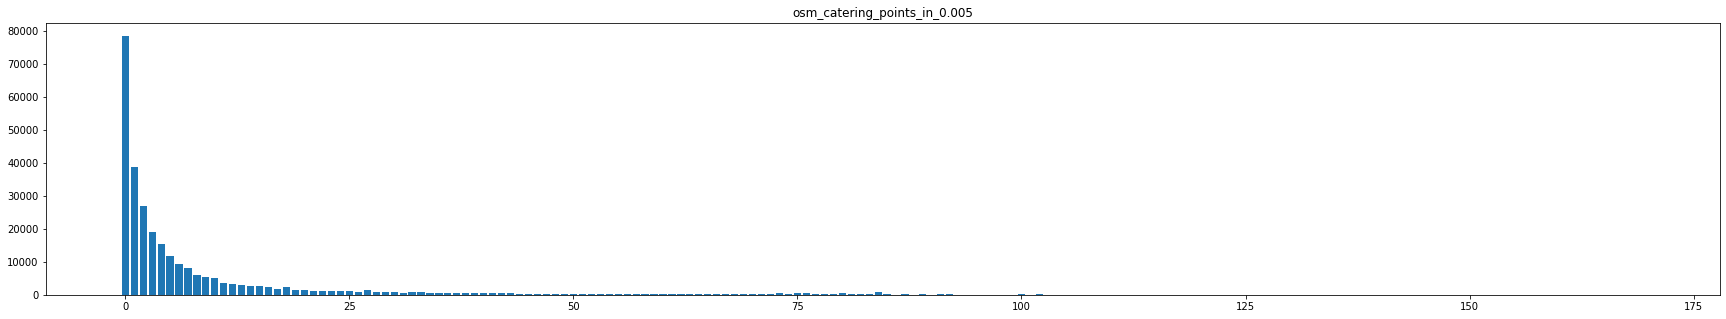

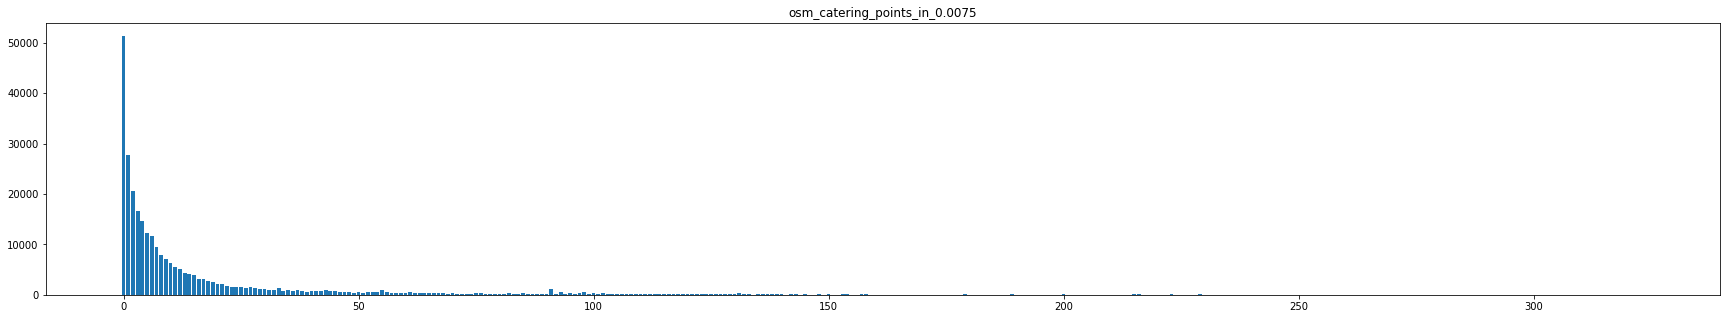

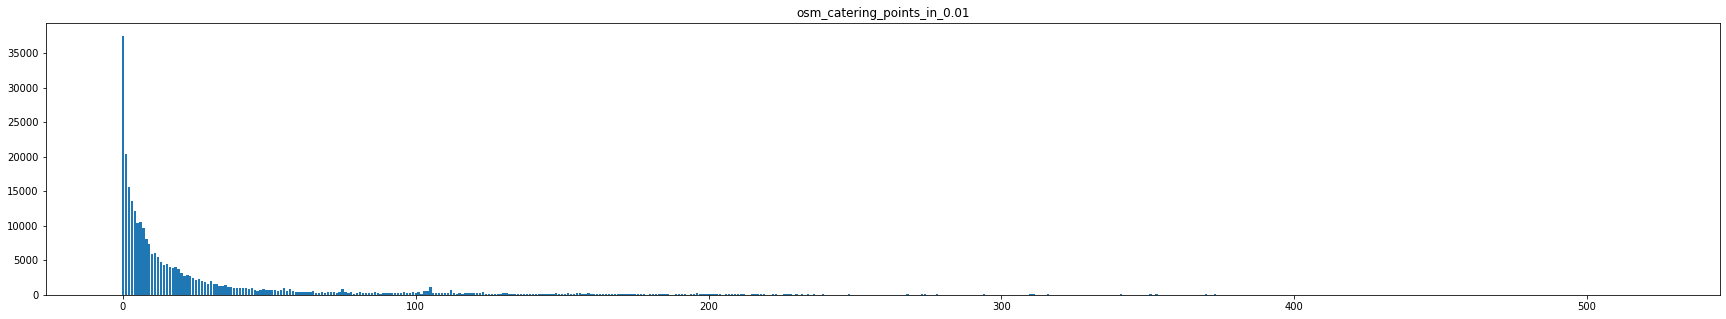

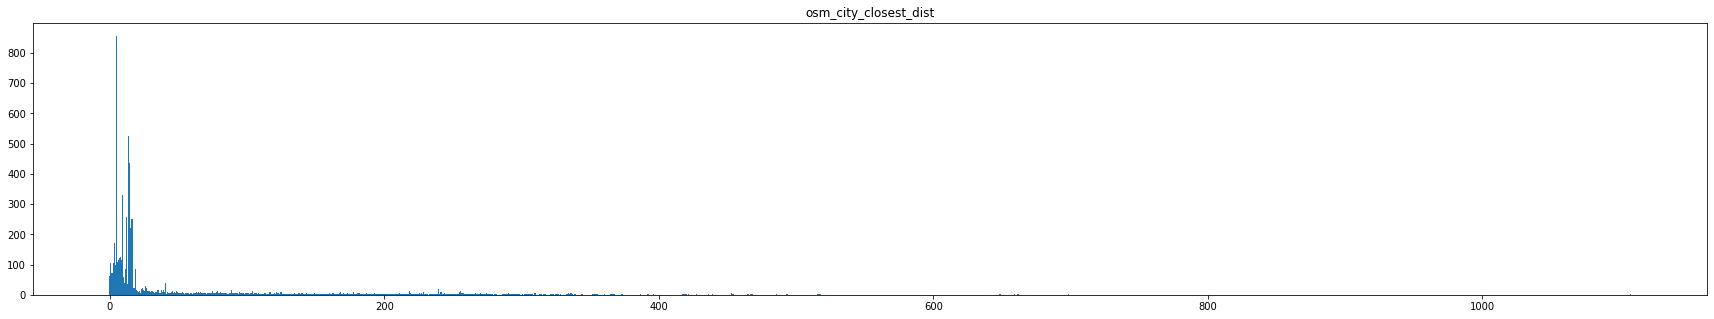

/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32485 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33452 missing from current font.
  font.set_text(s, 0.0, flags=flags)


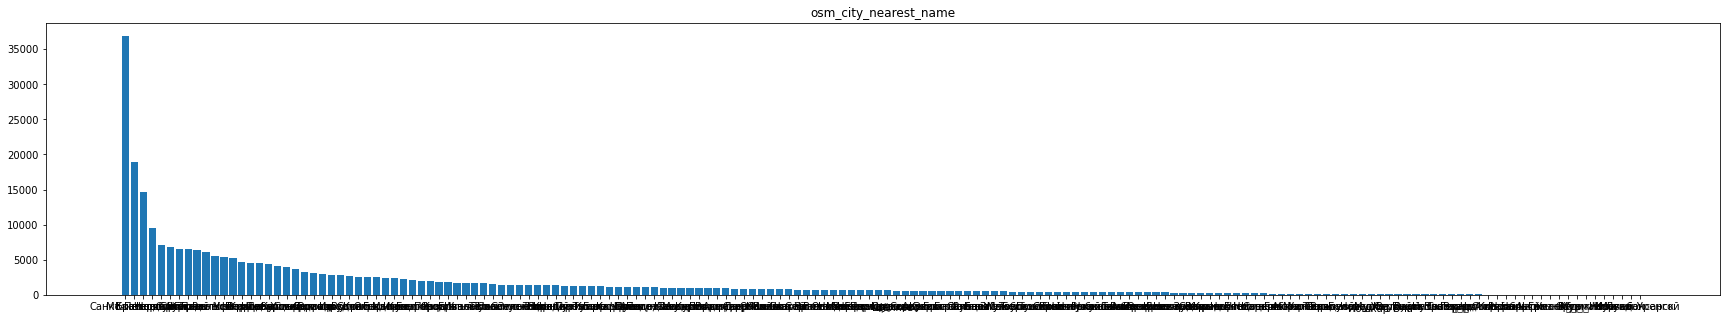

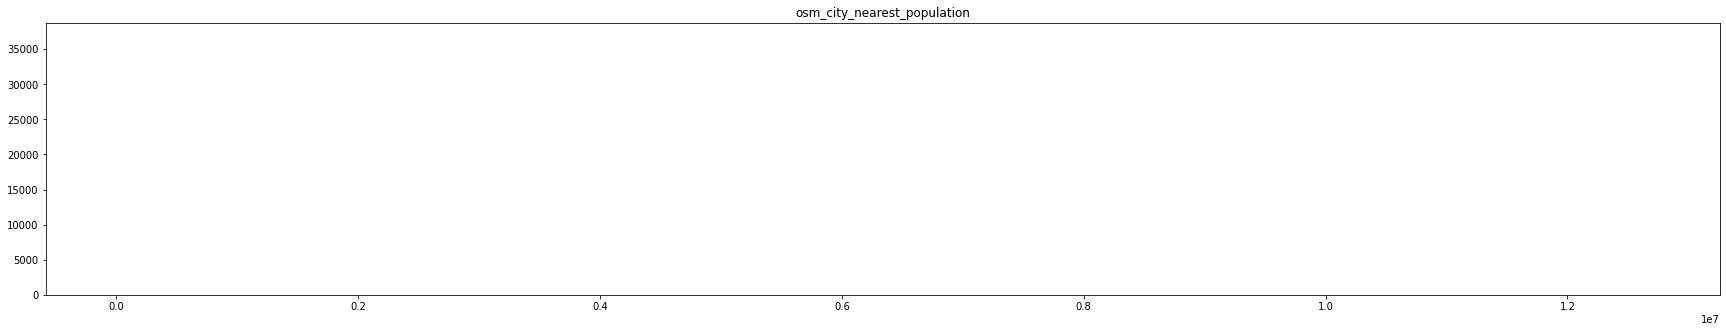

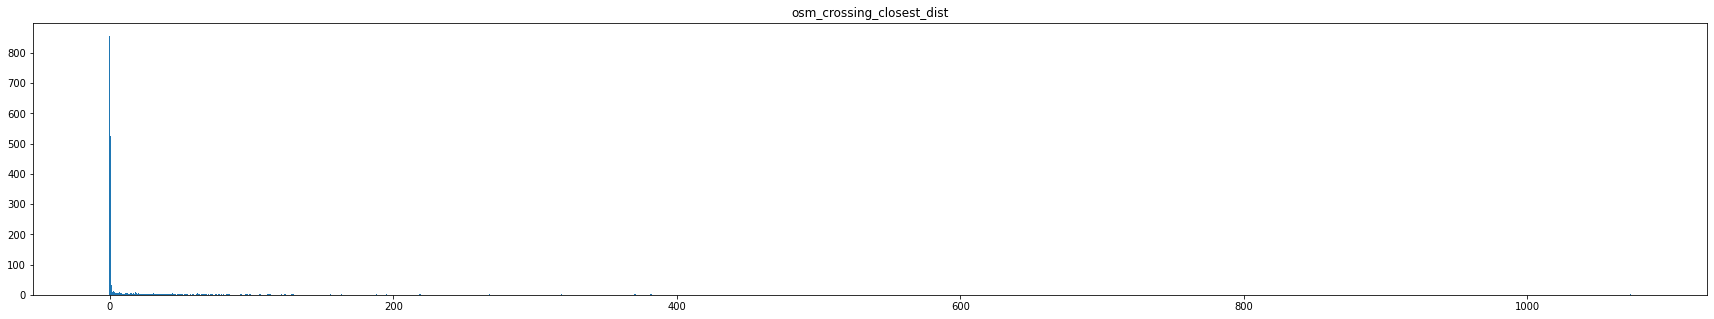

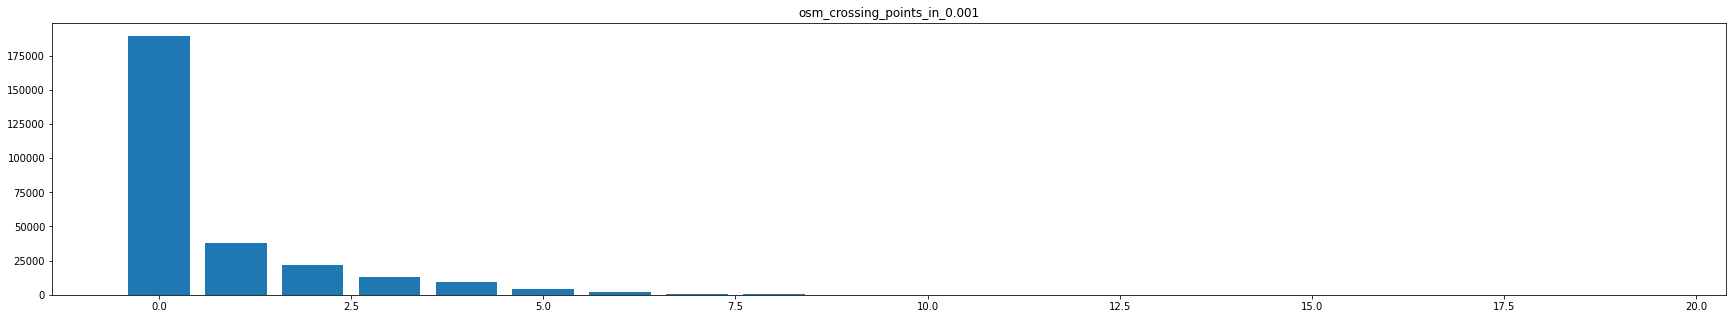

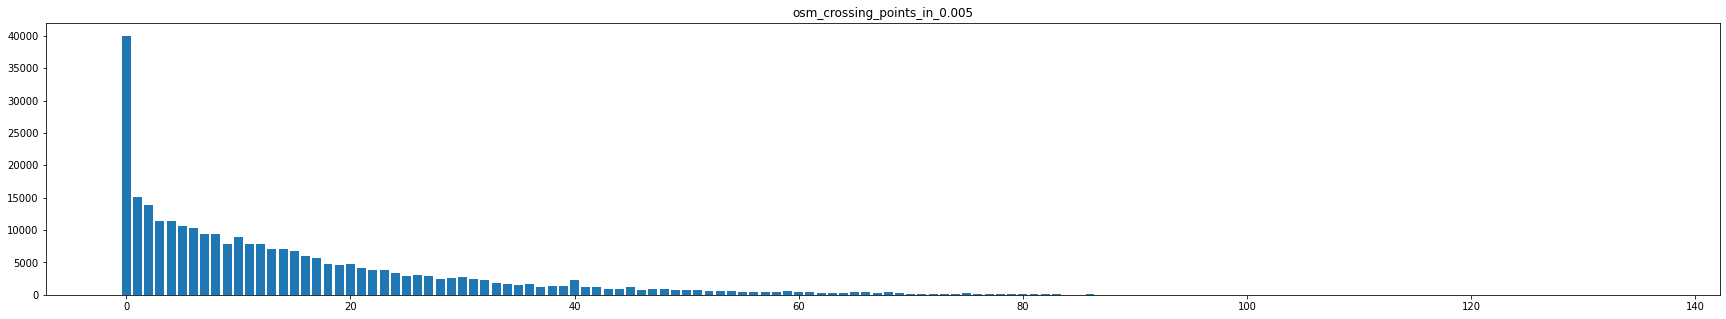

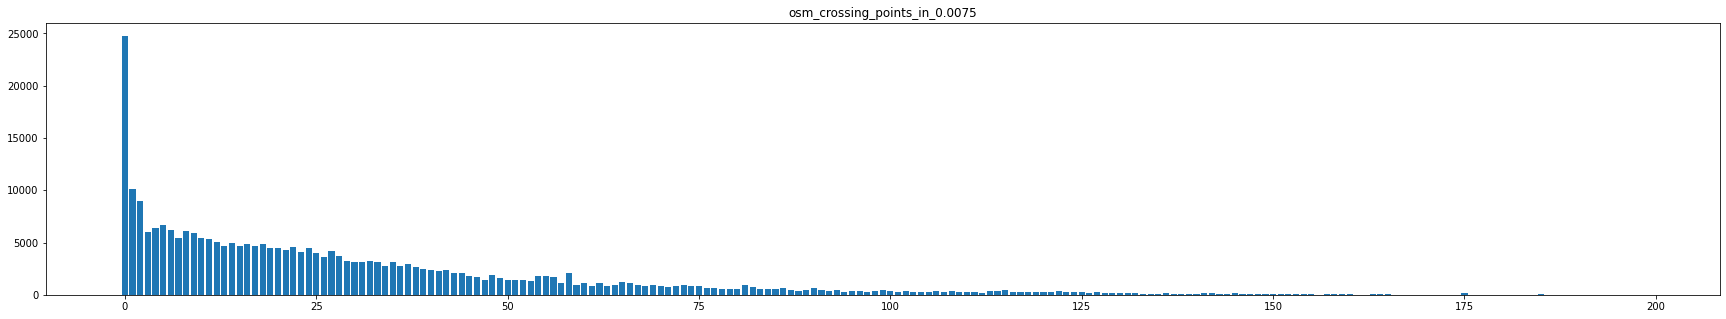

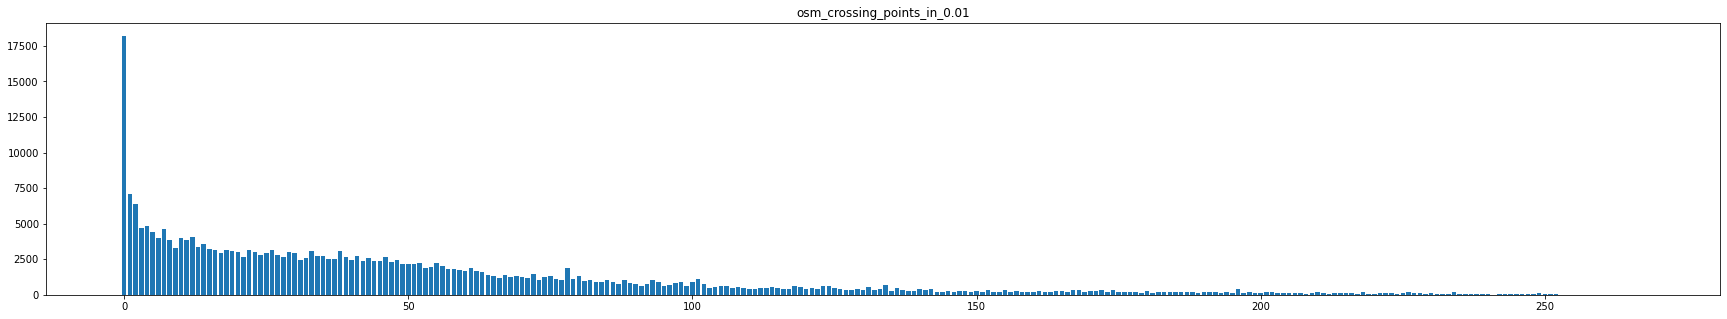

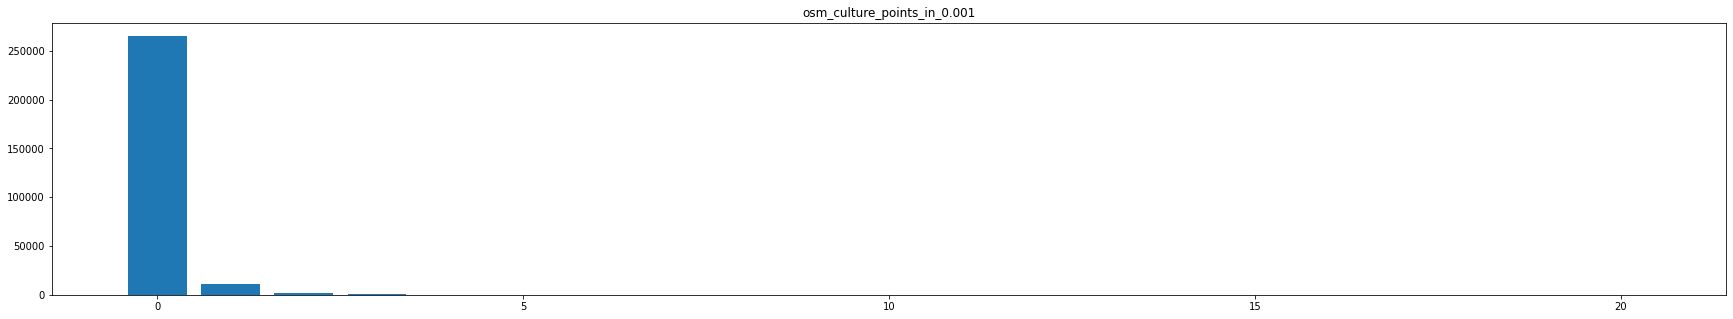

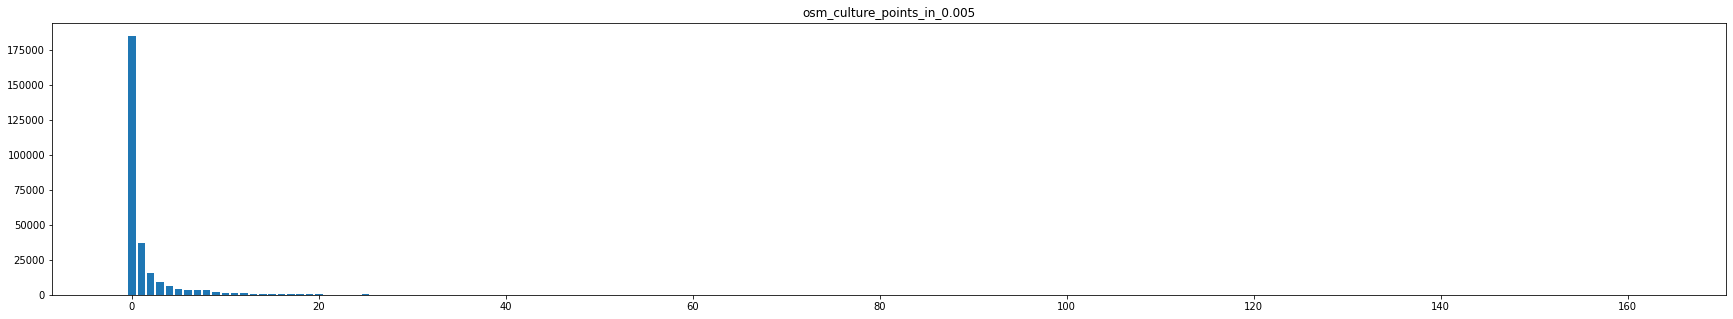

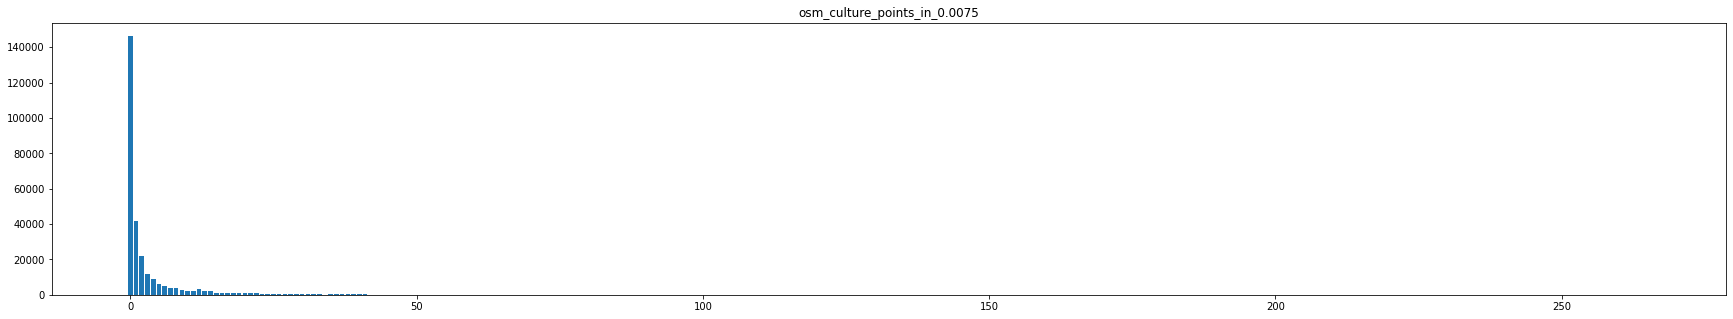

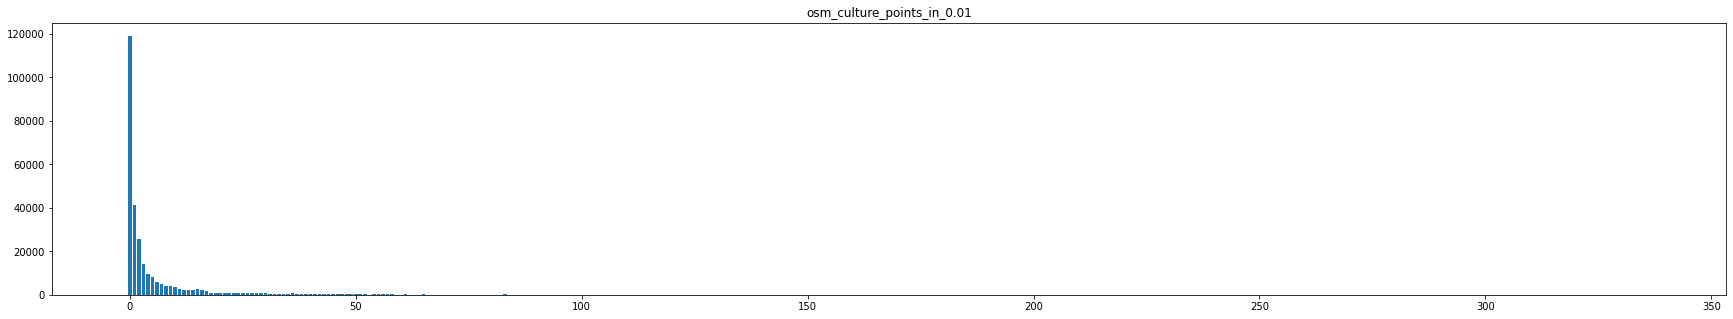

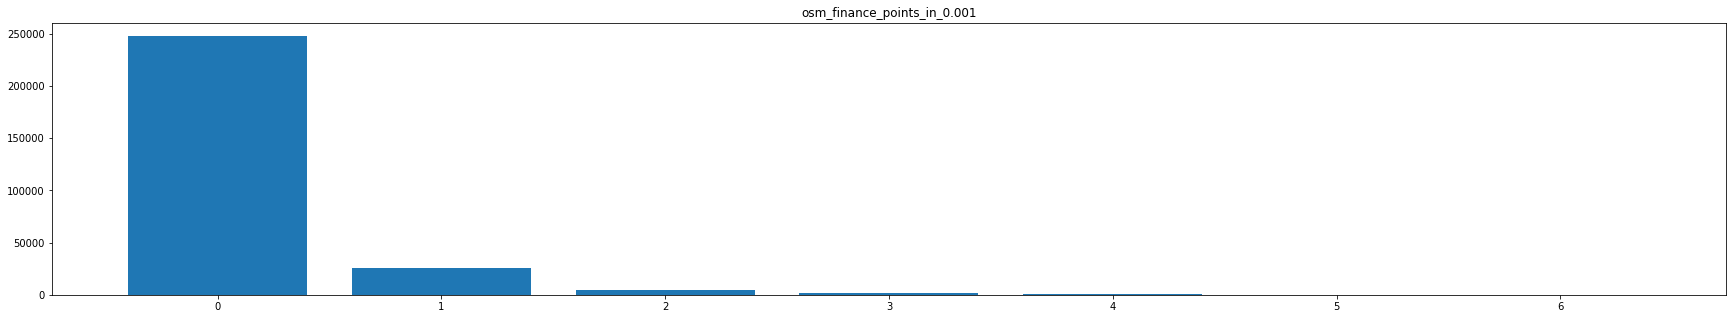

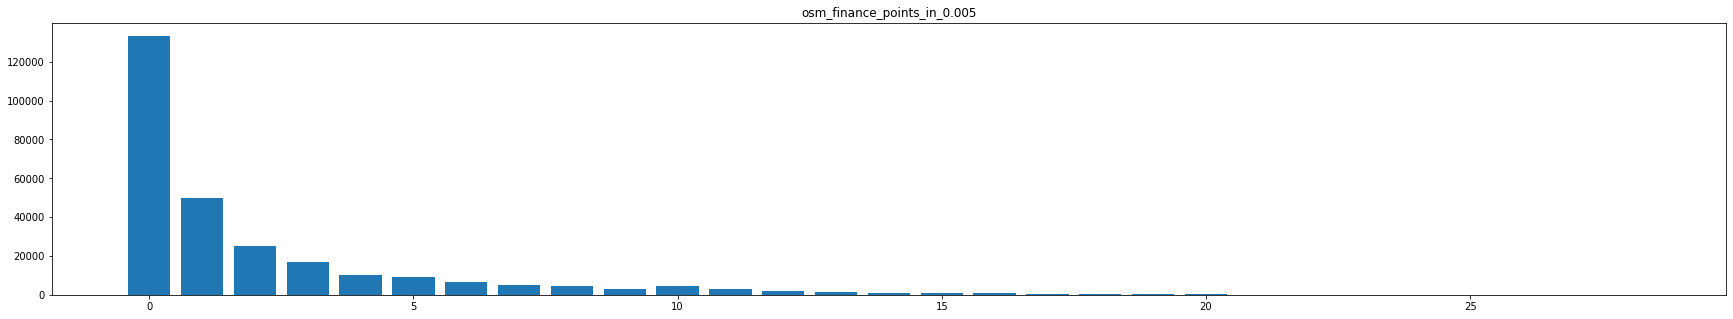

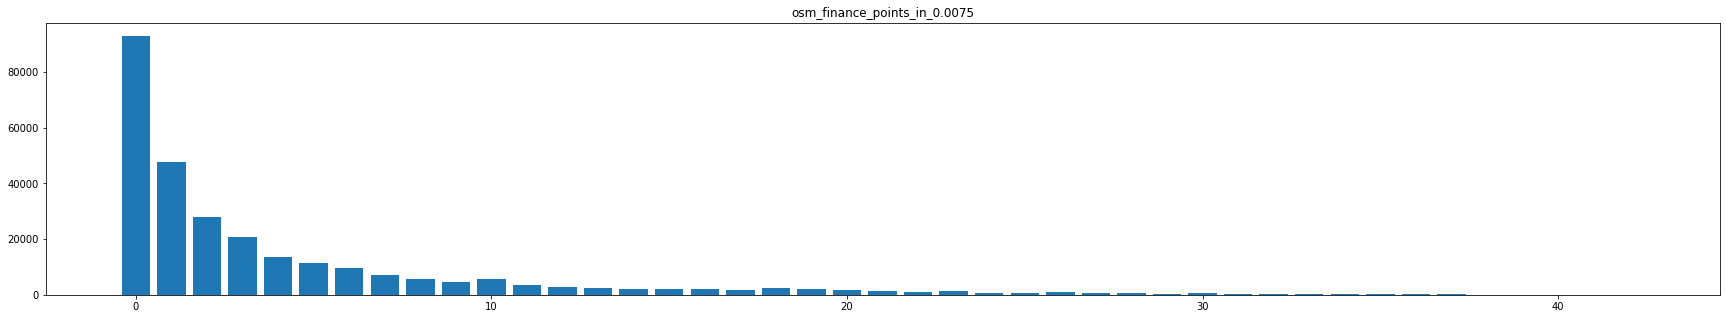

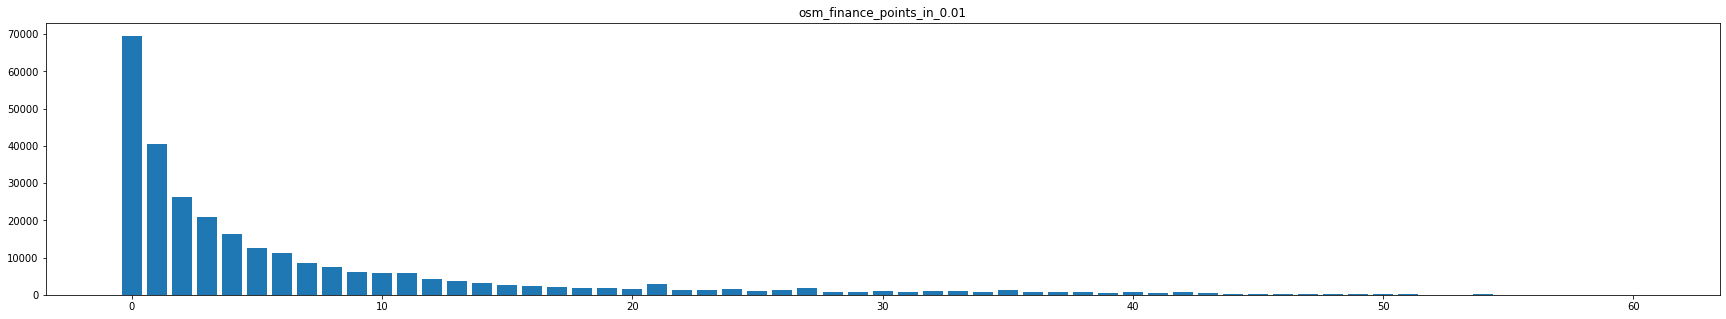

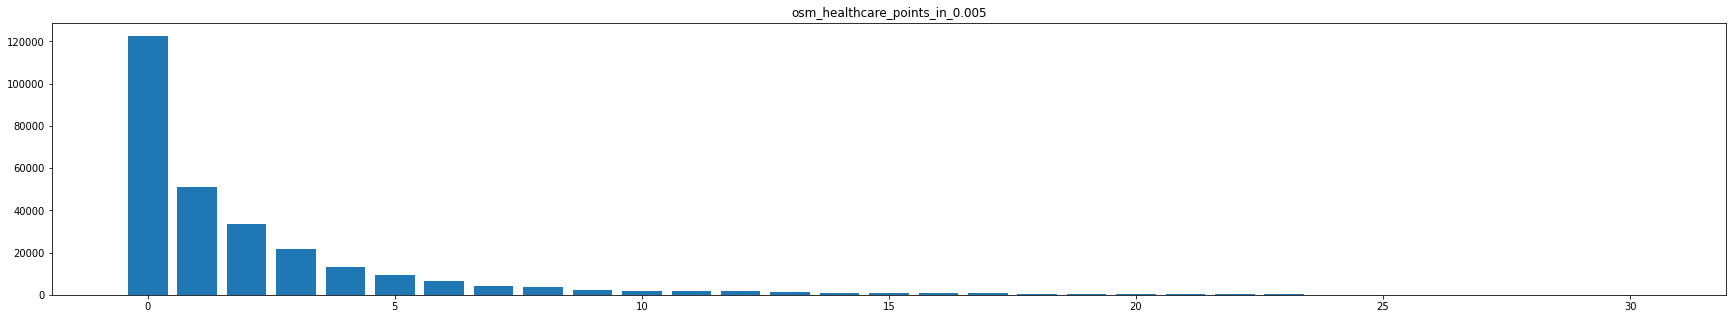

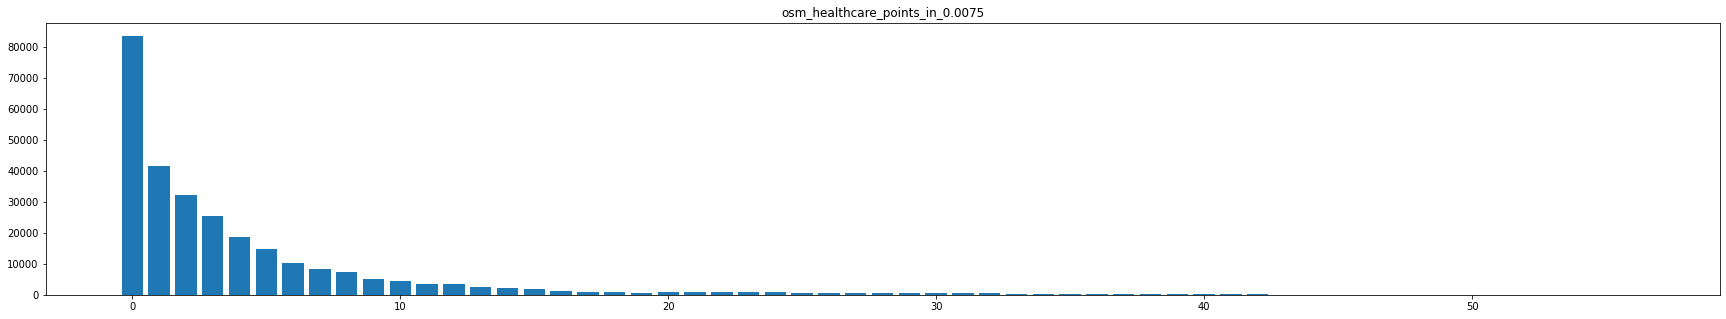

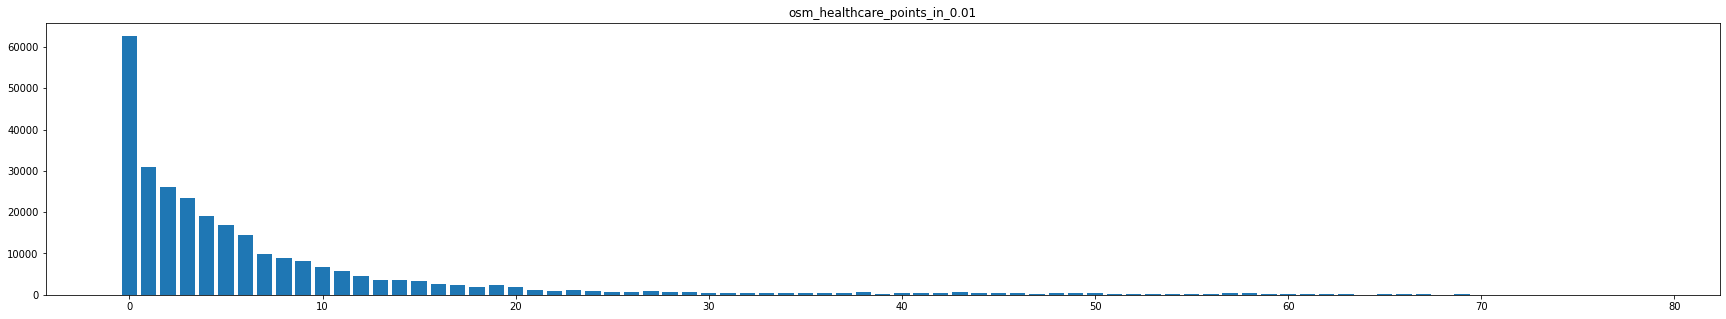

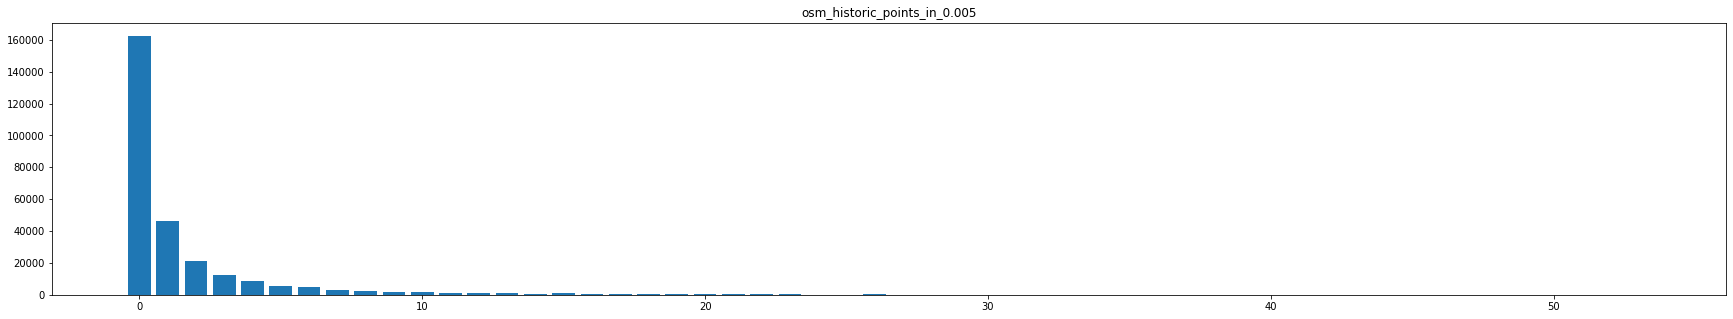

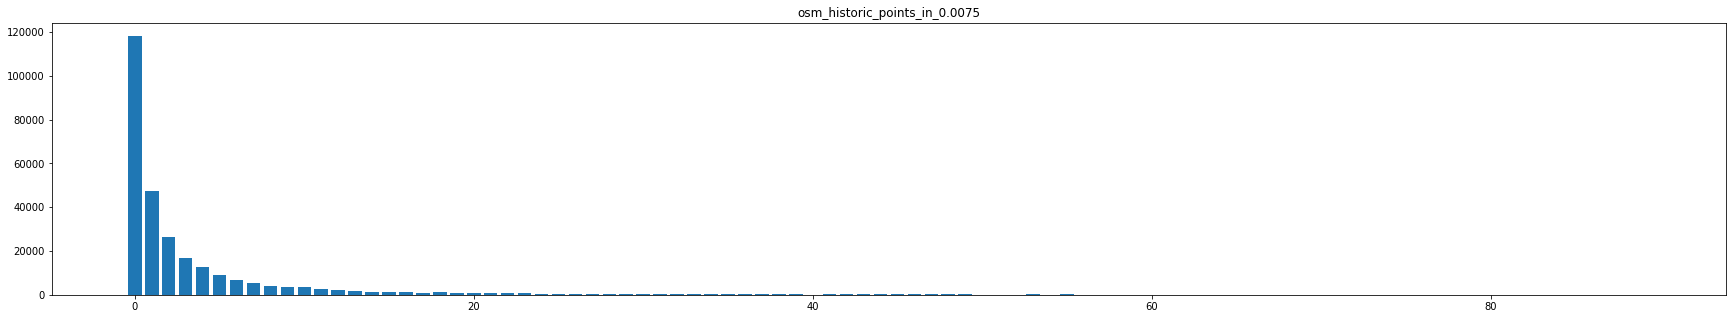

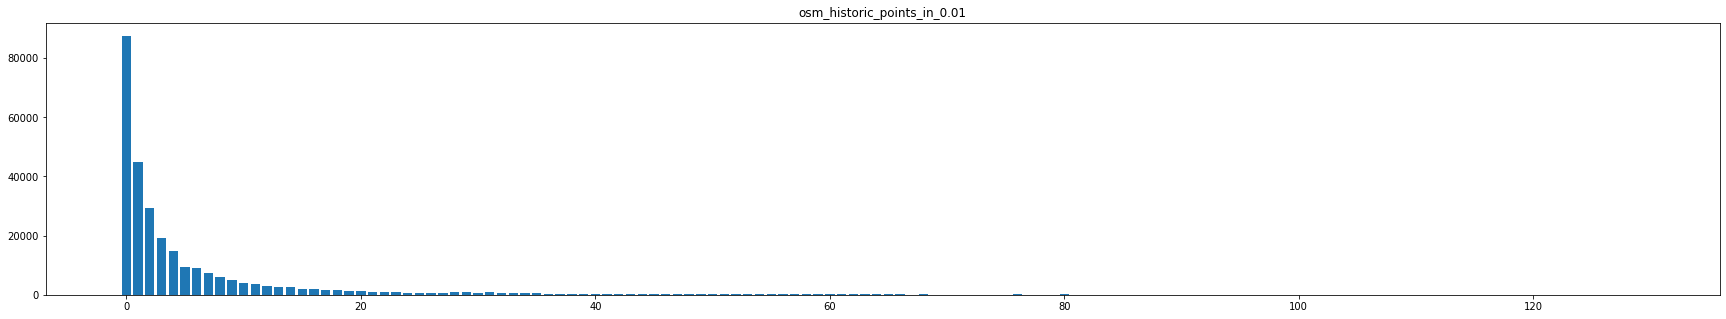

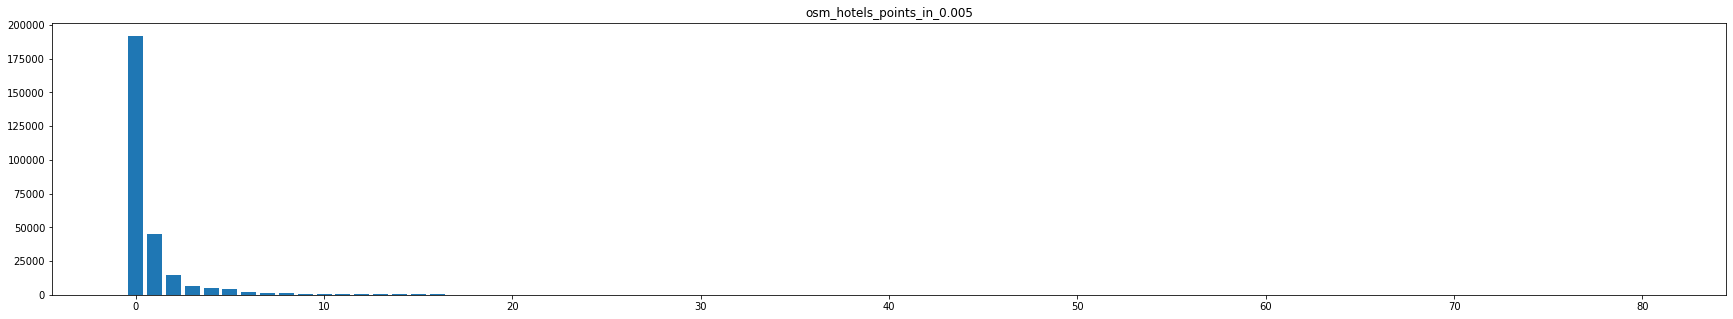

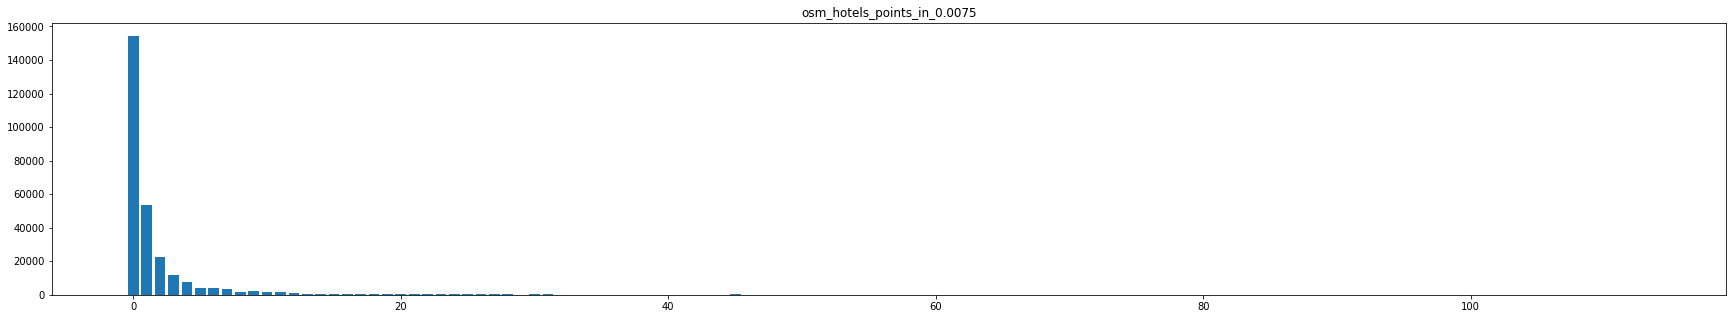

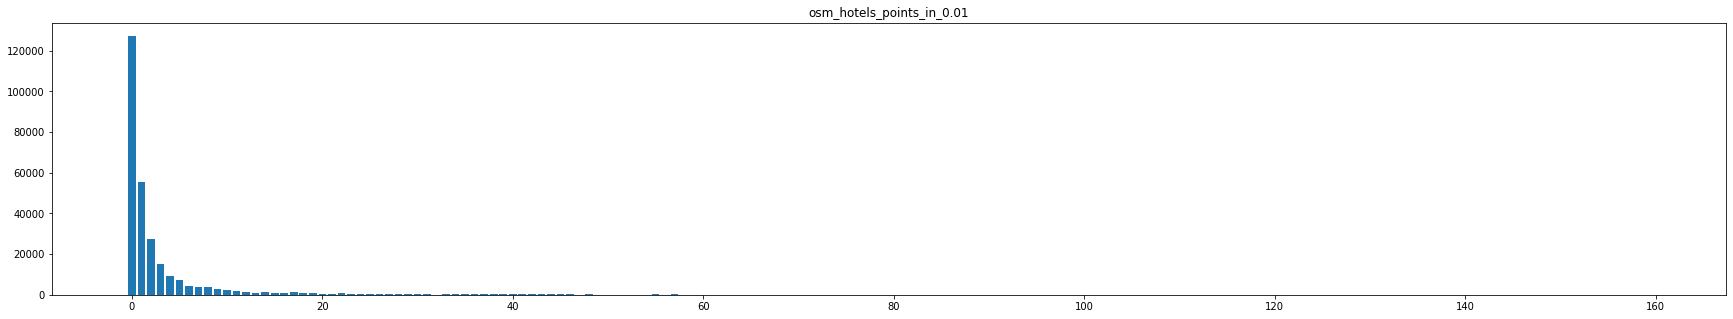

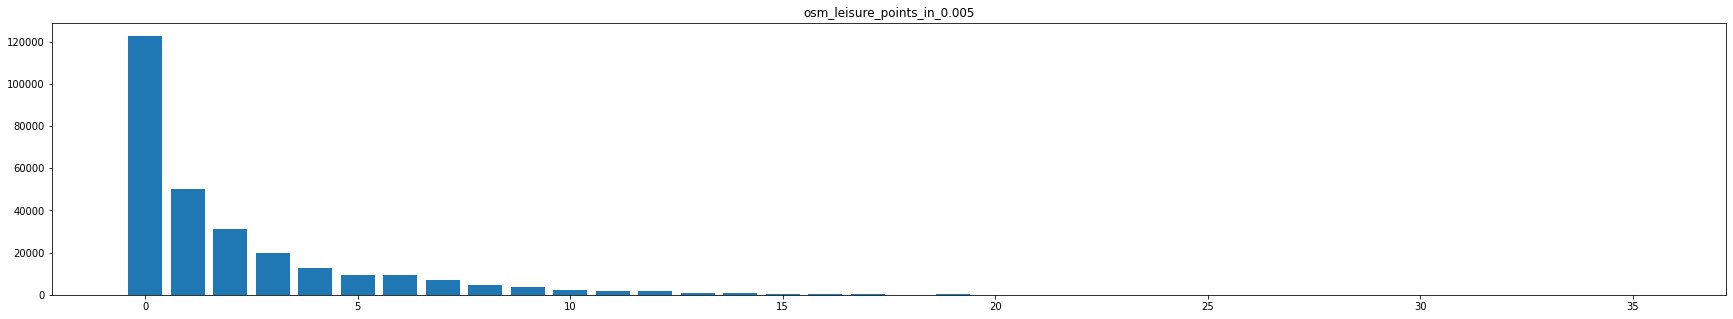

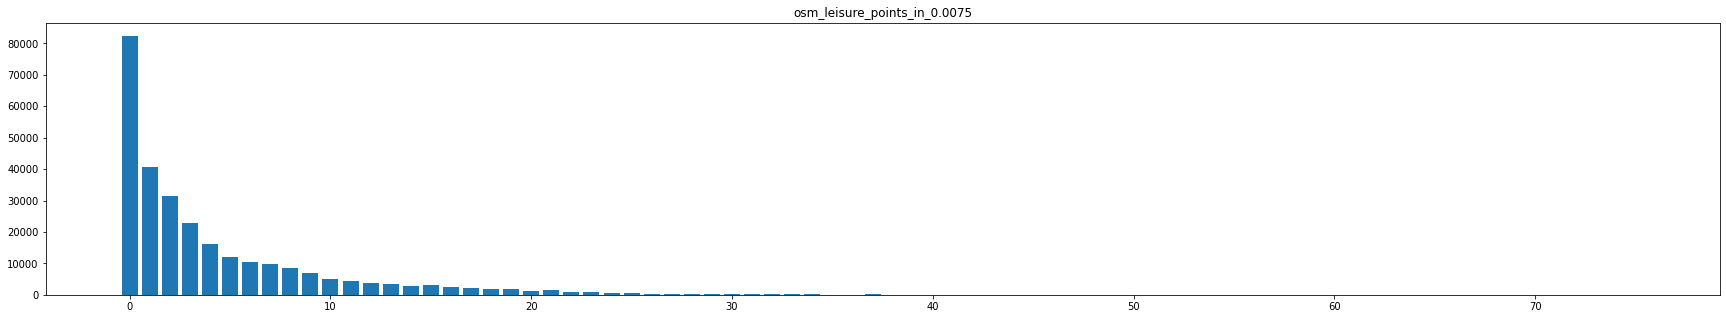

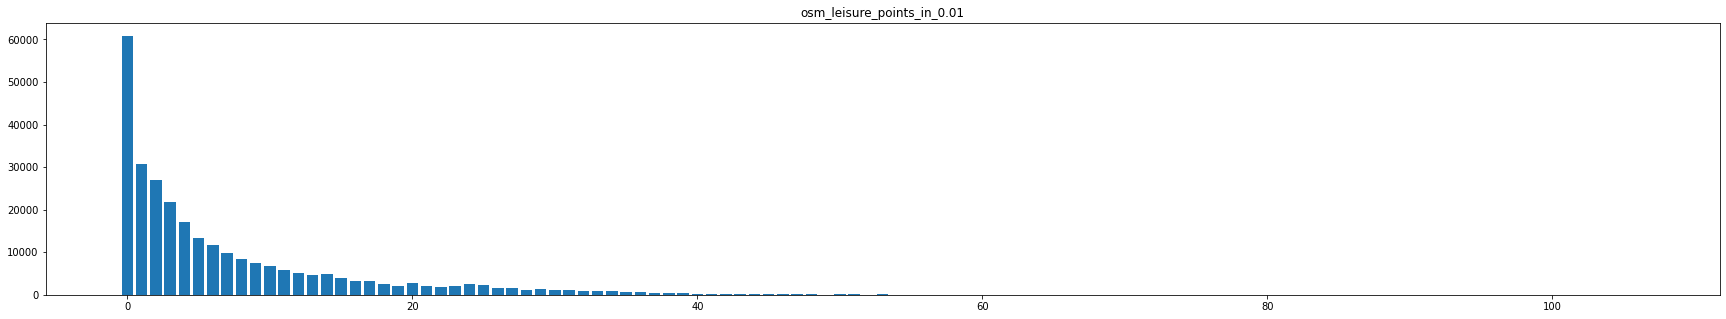

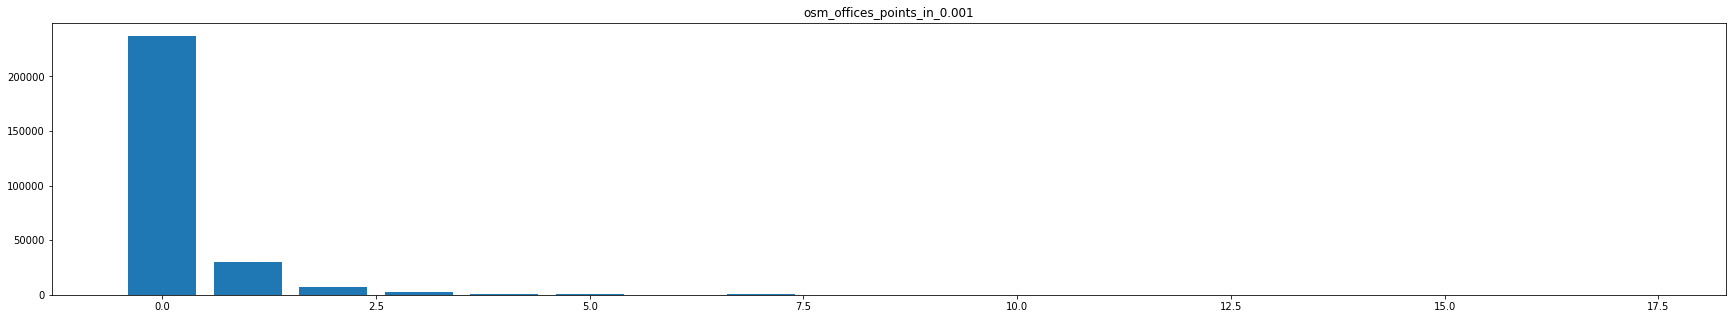

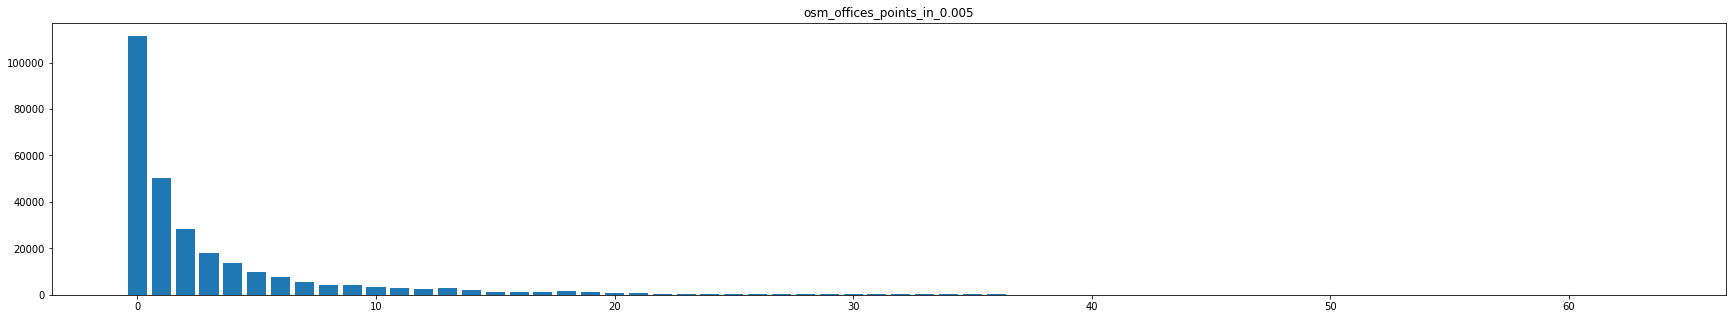

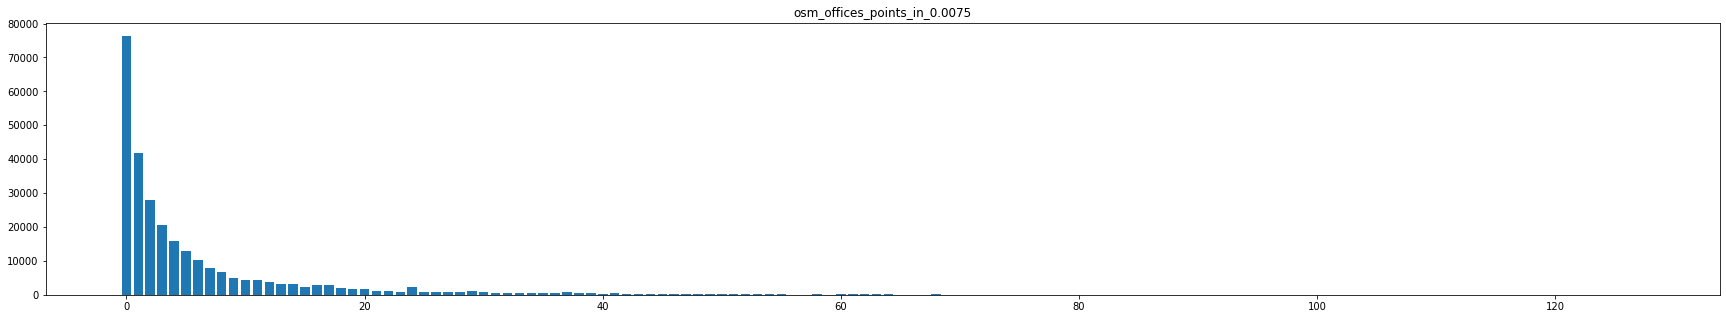

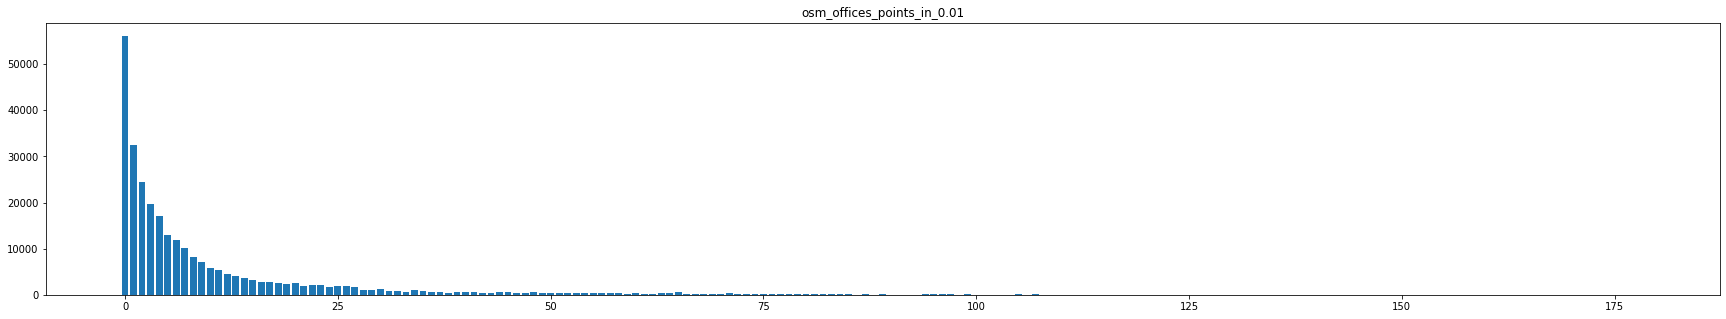

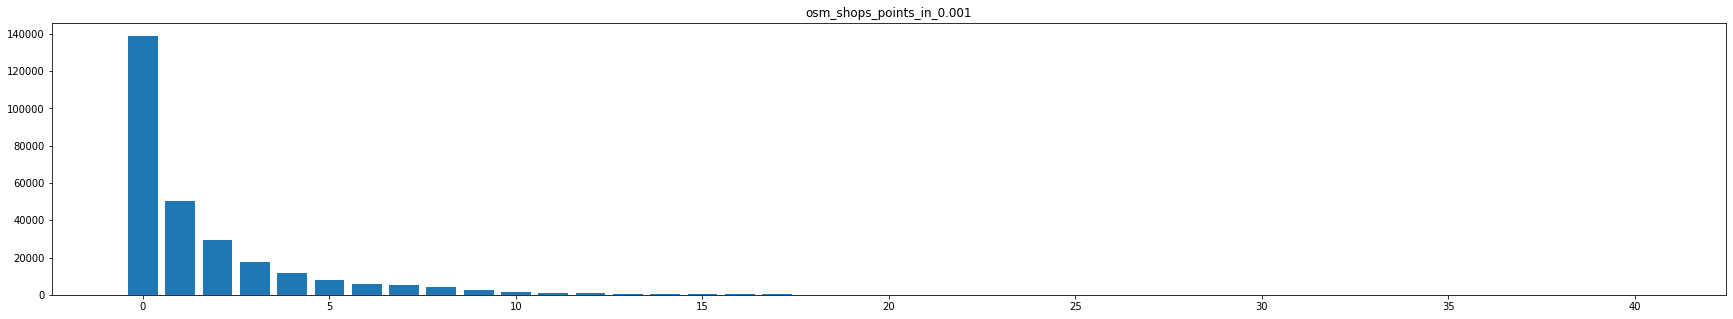

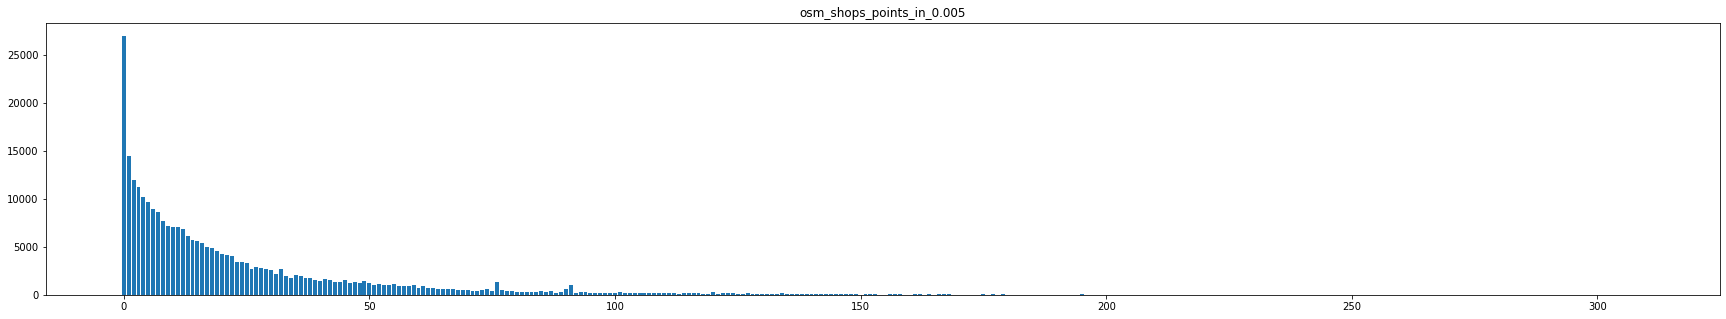

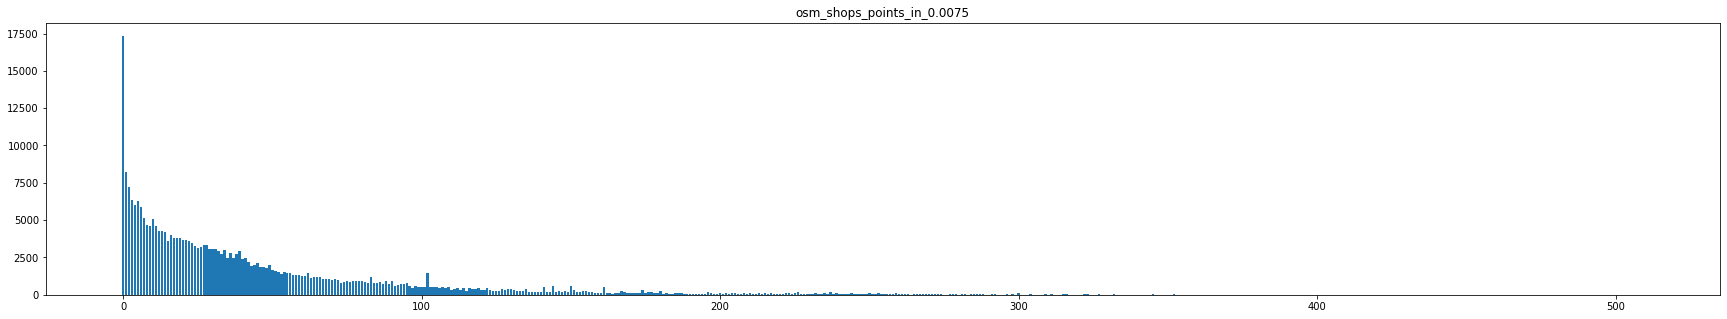

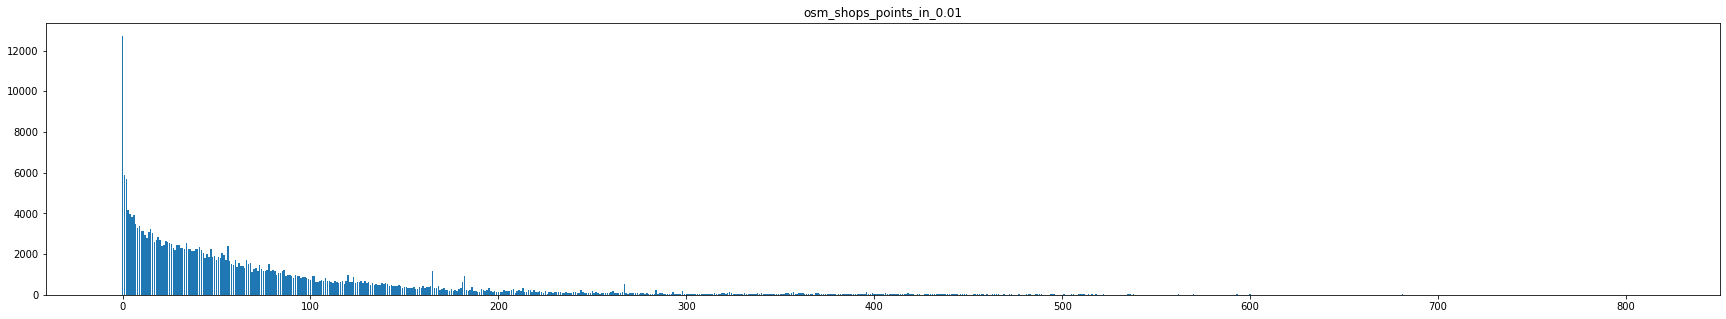

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x118204e50> (for post_execute):


KeyboardInterrupt: 

In [15]:
for i in range(len(osm)):
    fig, axs = plt.subplots(figsize=(30, 5))
    axs.set_title(osm[i])
    tmp = df_train[osm[i]].value_counts()
    axs.bar(height=tmp, x=tmp.index)
    plt.show()

In [ ]:
# большинство выбросов это влияние москва-сити(55.749510; 37.537083), там 920 офисов из выборки

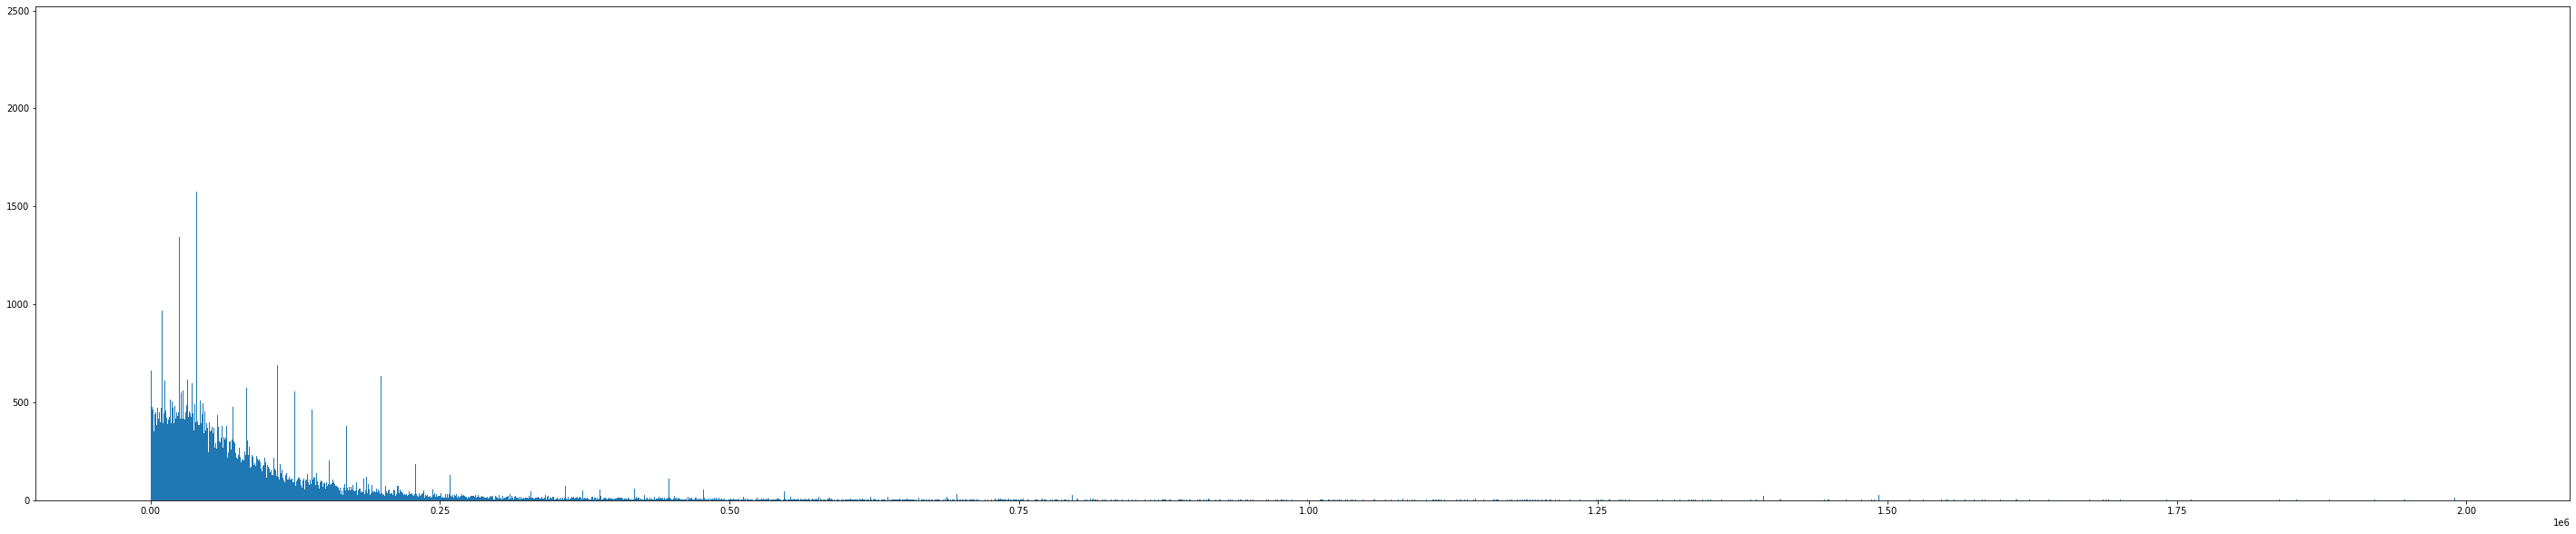

In [17]:
ig, axs = plt.subplots(figsize=(50, 10))
a = axs.hist(df_train['per_square_meter_price'], bins=10000)

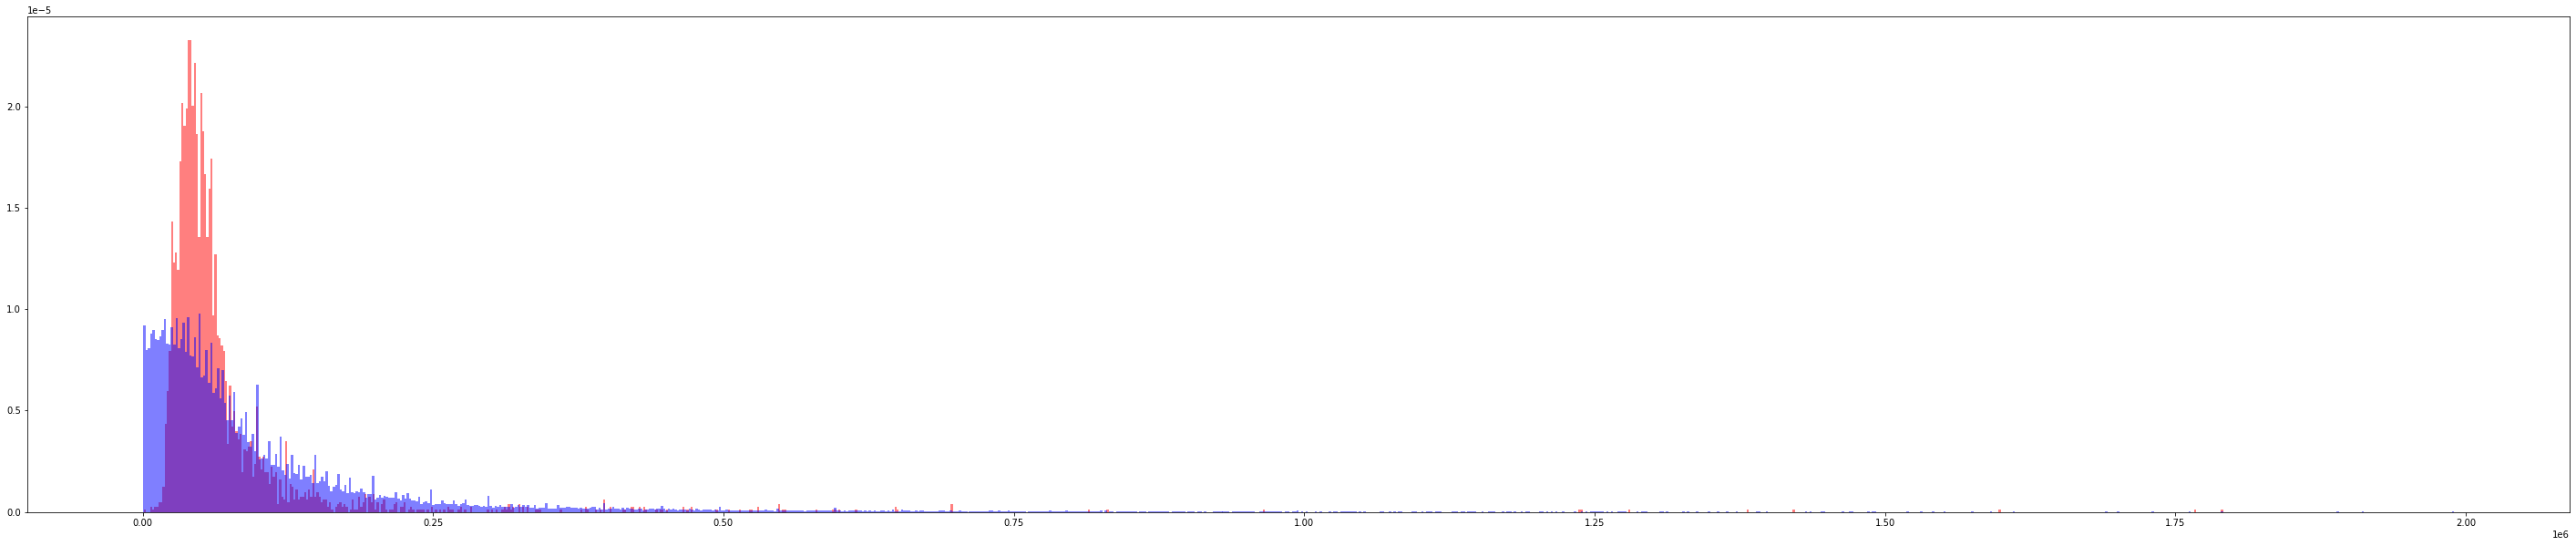

In [18]:
ig, axs = plt.subplots(figsize=(50, 10))
a = axs.hist(df_train.loc[df_train.price_type == 1, 'per_square_meter_price'], bins=1000, color='red', density=True, alpha=0.5)
a = axs.hist(df_train.loc[df_train.price_type == 0, 'per_square_meter_price'], bins=1000, color='blue', density=True, alpha=0.5)

In [13]:
df_train['per_square_meter_price'].quantile(0.1)

12188.816416679758

In [14]:
df_train[df_train['per_square_meter_price'] < df_train['per_square_meter_price'].quantile(0.1)].groupby('price_type').id.count()

price_type
0    27974
1        6
Name: id, dtype: int64

In [15]:
df_train['per_square_meter_price'].quantile(0.1)

12188.816416679758

In [16]:
df_train[df_train['per_square_meter_price'] > df_train['per_square_meter_price'].quantile(0.1)].head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [17]:
# 1 - если больше 10% квантиля
df_train['per_square_meter_price_bool'] = df_train['per_square_meter_price'] > df_train['per_square_meter_price'].quantile(0.1)

### для цен взятых с сайта объявлений часть объяв возможно это левые объявы, слишком дёшево, есть объявы по 400рубасов за метр, это дает смещение, нужно почистить

In [18]:
reforma = ['reform_count_of_houses_1000', 'reform_count_of_houses_500',
       'reform_house_population_1000', 'reform_house_population_500',
       'reform_mean_floor_count_1000', 'reform_mean_floor_count_500',
       'reform_mean_year_building_1000', 'reform_mean_year_building_500']

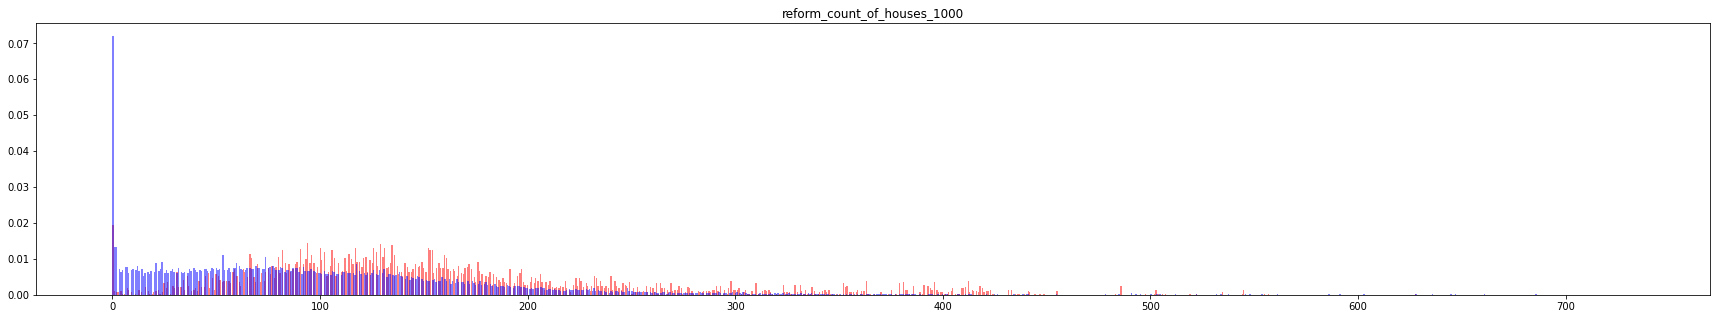

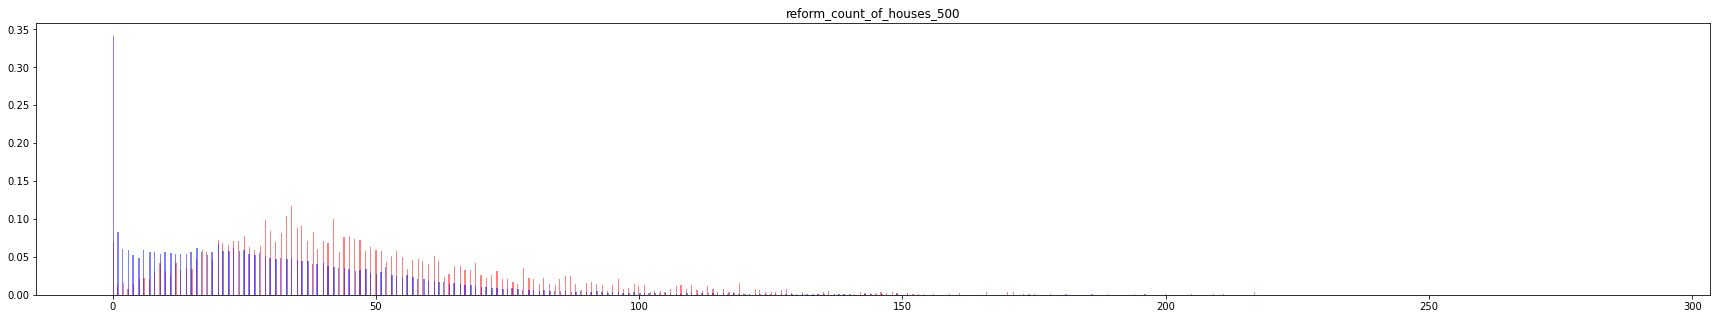

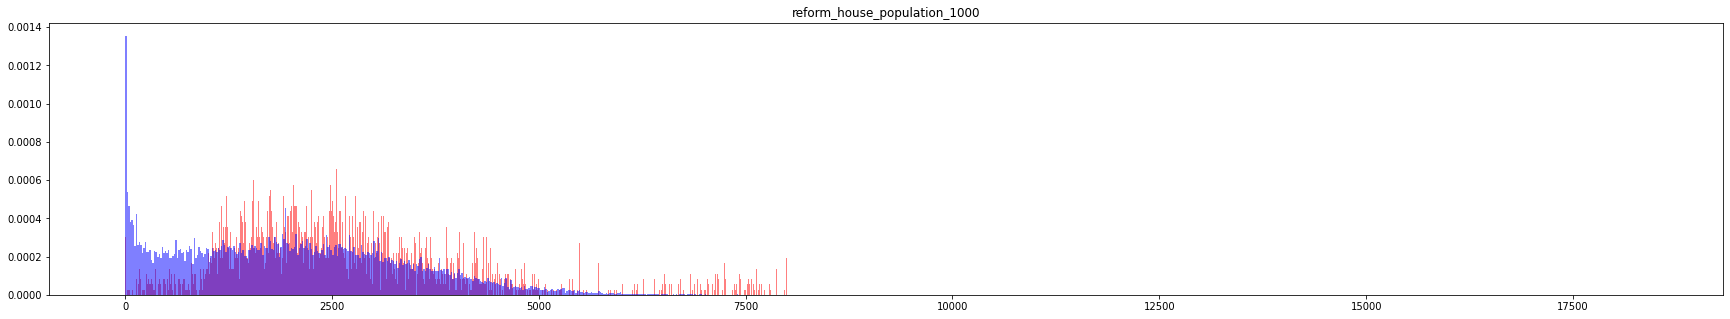

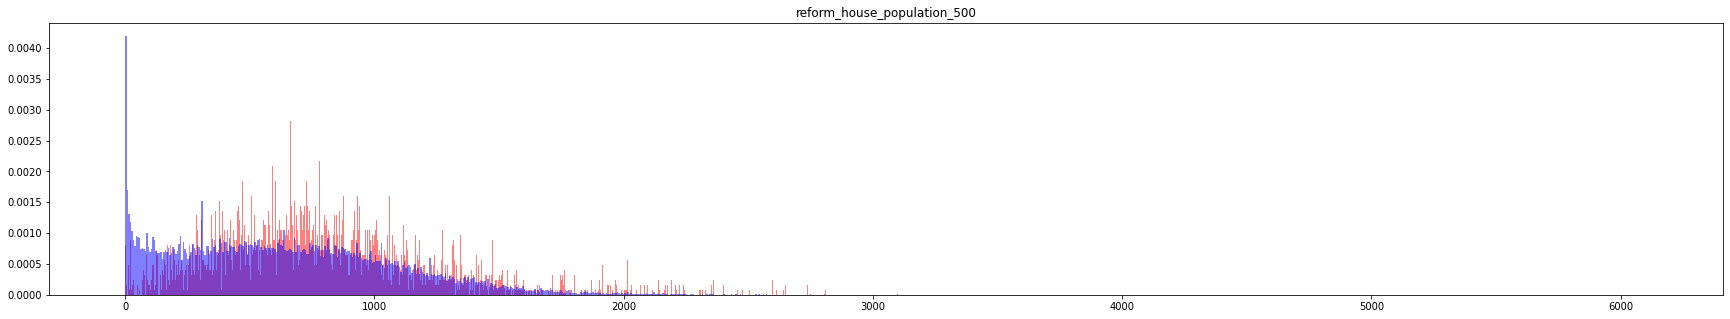

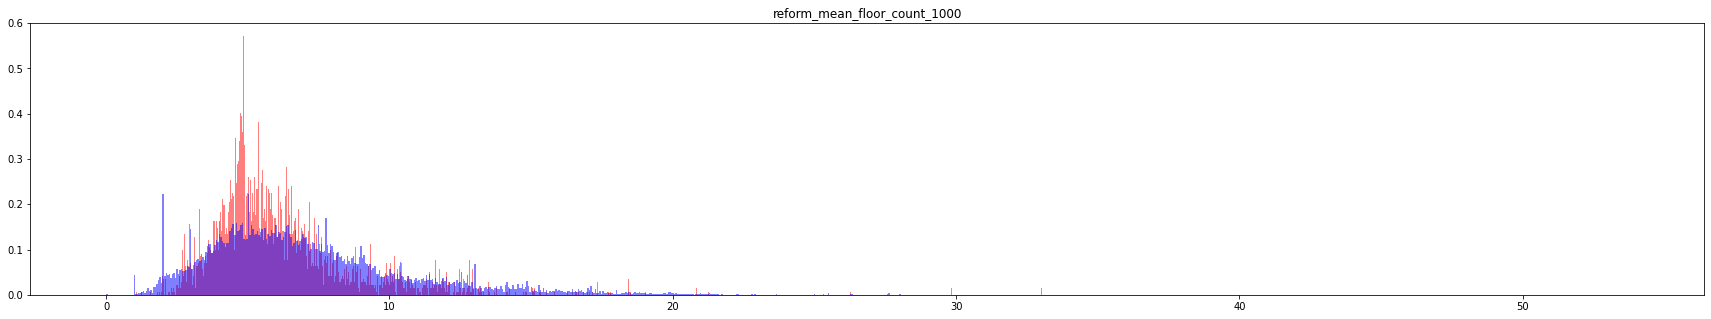

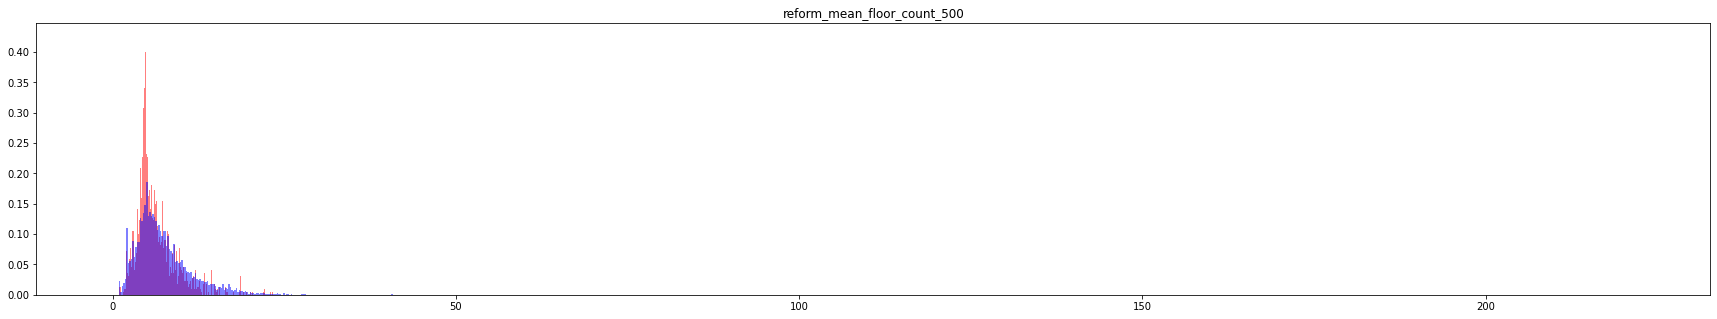

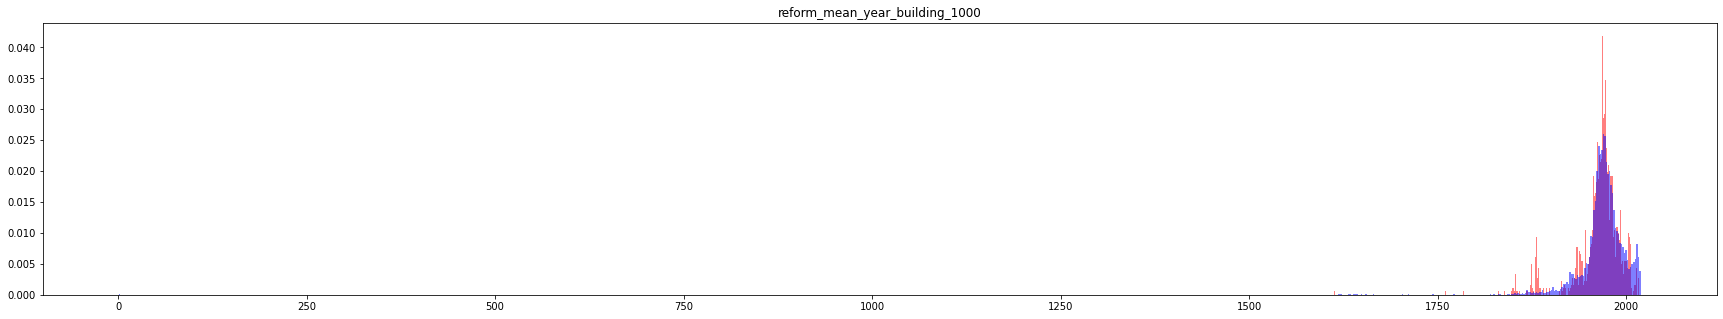

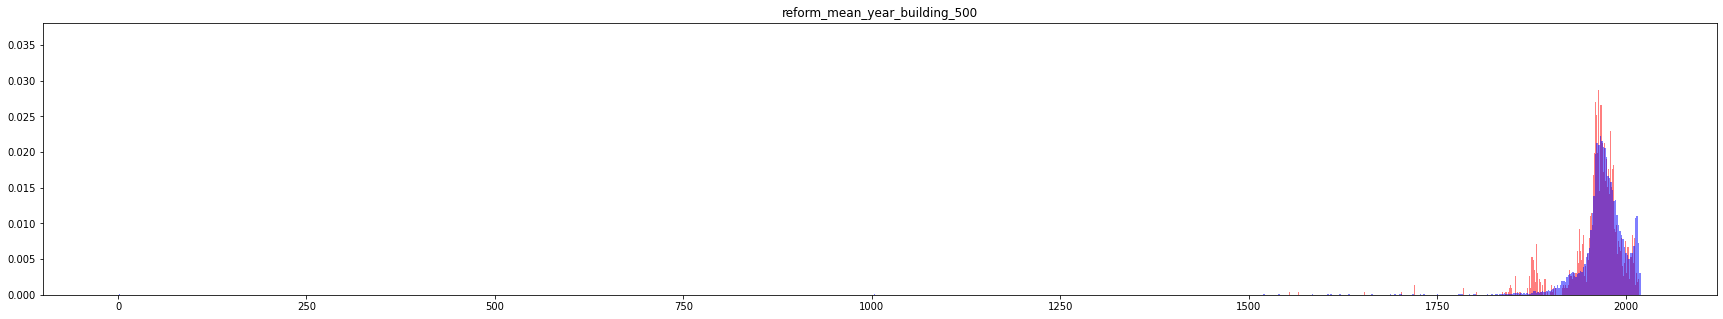

In [19]:
for i in range(len(reforma)):
    fig, axs = plt.subplots(figsize=(30, 5))
    axs.set_title(reforma[i])
    a = axs.hist(df_train.loc[df_train.price_type == 1, reforma[i]], bins=1000, color='red', density=True, alpha=0.5)
    a = axs.hist(df_train.loc[df_train.price_type == 0, reforma[i]], bins=1000, color='blue', density=True, alpha=0.5)
    plt.show()

In [20]:
df_train[df_train.reform_mean_year_building_1000 < 1000].shape

(82, 78)

In [21]:
df_train[df_train.reform_mean_year_building_1000 < 1000]

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,per_square_meter_price_bool
1241,Большая Глушица,NaN,COL_1276,52.294360,50.578278,0,0,0,0,0,0,0,0,0,0,0,0,105.327099,Самара,1156644.0,7.802813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104.037535,30.389966,0,0,0,7.820080,0,0,0,14925.000000,4,0,20.0,NaN,2.000000,NaN,987.000000,NaN,Самарская область,200.0,S22665,2020-01-05,110,0,True
9948,Подстепки,NaN,COL_10174,53.611454,49.038948,0,0,0,1,0,0,0,0,0,0,0,1,26.613380,Тольятти,707408.0,11.740633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89.751540,17.823365,0,0,0,5.181230,0,0,0,16583.333333,1,1,0.0,0.0,NaN,NaN,1.000000,1.000000,Самарская область,900.0,S24233,2020-01-12,10,0,True
10337,Клявлино,NaN,COL_10574,54.264080,52.024080,0,2,2,3,0,0,0,0,0,0,0,0,72.932530,Альметьевск,151157.0,0.477339,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,163.726863,0.483475,1,1,1,2.211133,0,0,0,12896.296296,52,3,176.0,4.0,2.000000,2.000000,229.134615,1.000000,Самарская область,135.0,S33438,2020-01-12,110,0,True
22607,"Комсомольский район, с. Марково",1.0,COL_23140,57.019825,40.494670,0,0,1,1,0,0,0,0,0,0,0,0,29.112181,Иваново,409285.0,9.907059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215.530795,85.405674,0,0,0,9.916713,0,0,0,3383.137673,1,0,6.0,NaN,2.000000,NaN,1.000000,NaN,Ивановская область,93.7,S13521,2020-01-19,10,0,False
25691,Магнитогорск,NaN,COL_26290,53.372864,59.240128,1,3,3,3,0,0,0,0,0,0,0,0,17.975497,Магнитогорск,413253.0,0.340639,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,391.765790,24.151493,0,0,0,0.323733,3,3,3,2819.000000,2,0,0.0,NaN,NaN,NaN,1.000000,NaN,Челябинская область,3000.0,S28063,2020-01-26,110,0,False
31831,Самара,1.0,COL_32564,53.181213,50.172356,0,0,1,10,0,0,0,2,0,0,0,0,4.345561,Самара,1156644.0,0.670427,0,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,9,2.141251,1.291313,0,0,0,0.408719,3,7,11,37588.888889,58,0,467.0,NaN,2.982456,NaN,861.508772,NaN,Самарская область,450.0,S14120,2020-01-26,10,0,True
35268,Нефтегорск,NaN,COL_36085,52.909725,50

In [22]:
df_train['reform_mean_year_building_1000_bool'] = df_train.reform_mean_year_building_1000 > 1000

### В Самаре 1800 домов, вокруг которых средний год постройки домов до 1800г , но согласно вики старых домов там почти нет, это выброс
### Есть 82 дома, где средний год постройки соседних менее 1000г

### reform_count_of_houses_1000  есть много случаев когда по карте дома есть, а в данных и из осм и из реформы нет. Как решать непонятно

In [23]:
df_train['reform_count_of_houses_1000_bool_m10'] = (df_train.reform_count_of_houses_1000 > 5) & (df_train.city == 'Москва')

In [24]:
df_train['reform_count_of_houses_1000_bool_m10'] = ((df_train.reform_count_of_houses_1000 < 10) & (df_train.city == 'Москва')) == False

In [25]:
df_train['reform_count_of_houses_1000_bool_m10'].value_counts()

True     276964
False      2828
Name: reform_count_of_houses_1000_bool_m10, dtype: int64

In [26]:
df_train[df_train.city == 'Москва'].reform_count_of_houses_1000.mean()

101.7251053646689

### есть выбросы по площади, 24к квадратов это 3 футбольных поля, если ткнуть на карту, то там микроплощадь. Все левые данные из объяв

In [27]:
df_train['total_square_bool'] = df_train.total_square < df_train.total_square.quantile(0.999)

## смотрим распределение по времени
таймсириесы, говорили они до хака
запустить бы бейзлайн говорили во время

In [ ]:
# данных с price_type = 0 недостаточно для оценки
tmp = df_train[(df_train.city == 'Москва') & (df_train.price_type == 0)][['per_square_meter_price', 'date', 'total_square']]

5.1 50.0
50.0 74.0
74.0 95.8
95.8 120.0
120.0 150.0
150.0 202.0
202.0 287.5
287.5 446.0
446.0 770.0
770.0 1650.0


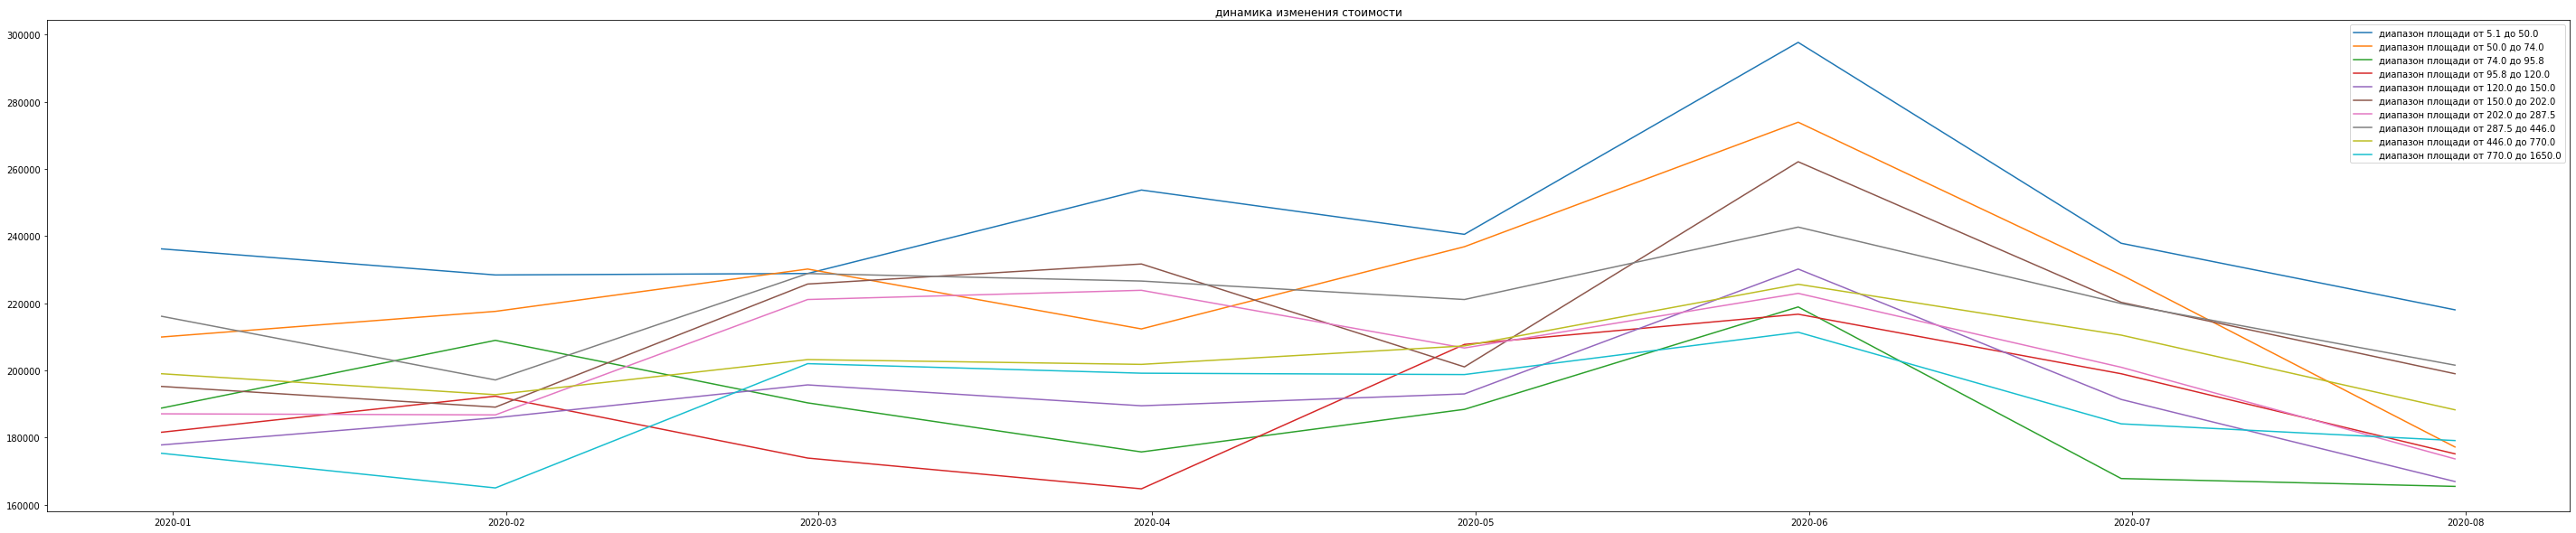

In [53]:
from pandas.tseries.offsets import MonthEnd

# делим все объекты на 10 чанков по общей площади
tmp = tmp.sort_values('total_square')
tmp.date = pd.to_datetime(tmp.date) - MonthEnd(1)

ig, axs = plt.subplots(figsize=(50, 10))
axs.set_title("динамика изменения стоимости")
for i in range(10):
    chunk = tmp.iloc[i * len(tmp) // 11 : (i + 1) * len(tmp) // 11]
    print(tmp.iloc[i * len(tmp) // 11].total_square, tmp.iloc[(i + 1) * len(tmp) // 11].total_square)
    tmp2 = chunk.groupby(['date']).median()
    axs.plot(tmp2.index, tmp2.per_square_meter_price, label=f'диапазон площади от {tmp.iloc[i * len(tmp) // 11].total_square} до {tmp.iloc[(i + 1) * len(tmp) // 11].total_square}')
plt.legend()

### это скорее сеазональность, тренда именно инфляции, подорожания ресурсов не видно

# посмотрим что за realty type

In [54]:
df_train.groupby('realty_type').id.count()

realty_type
10     148222
100     57361
110     74209
Name: id, dtype: int64

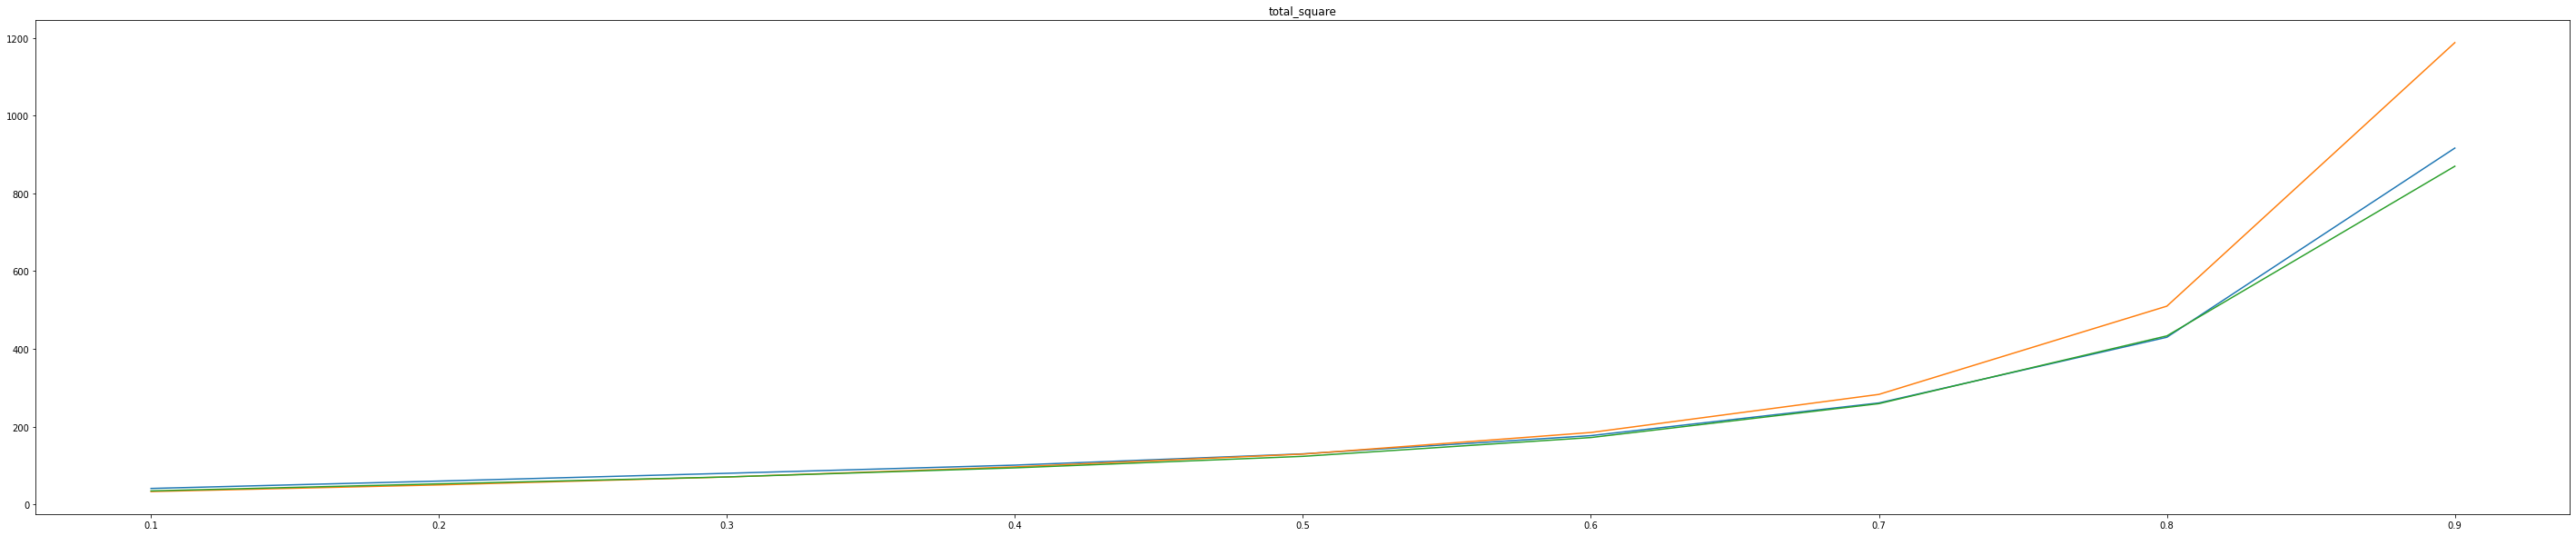

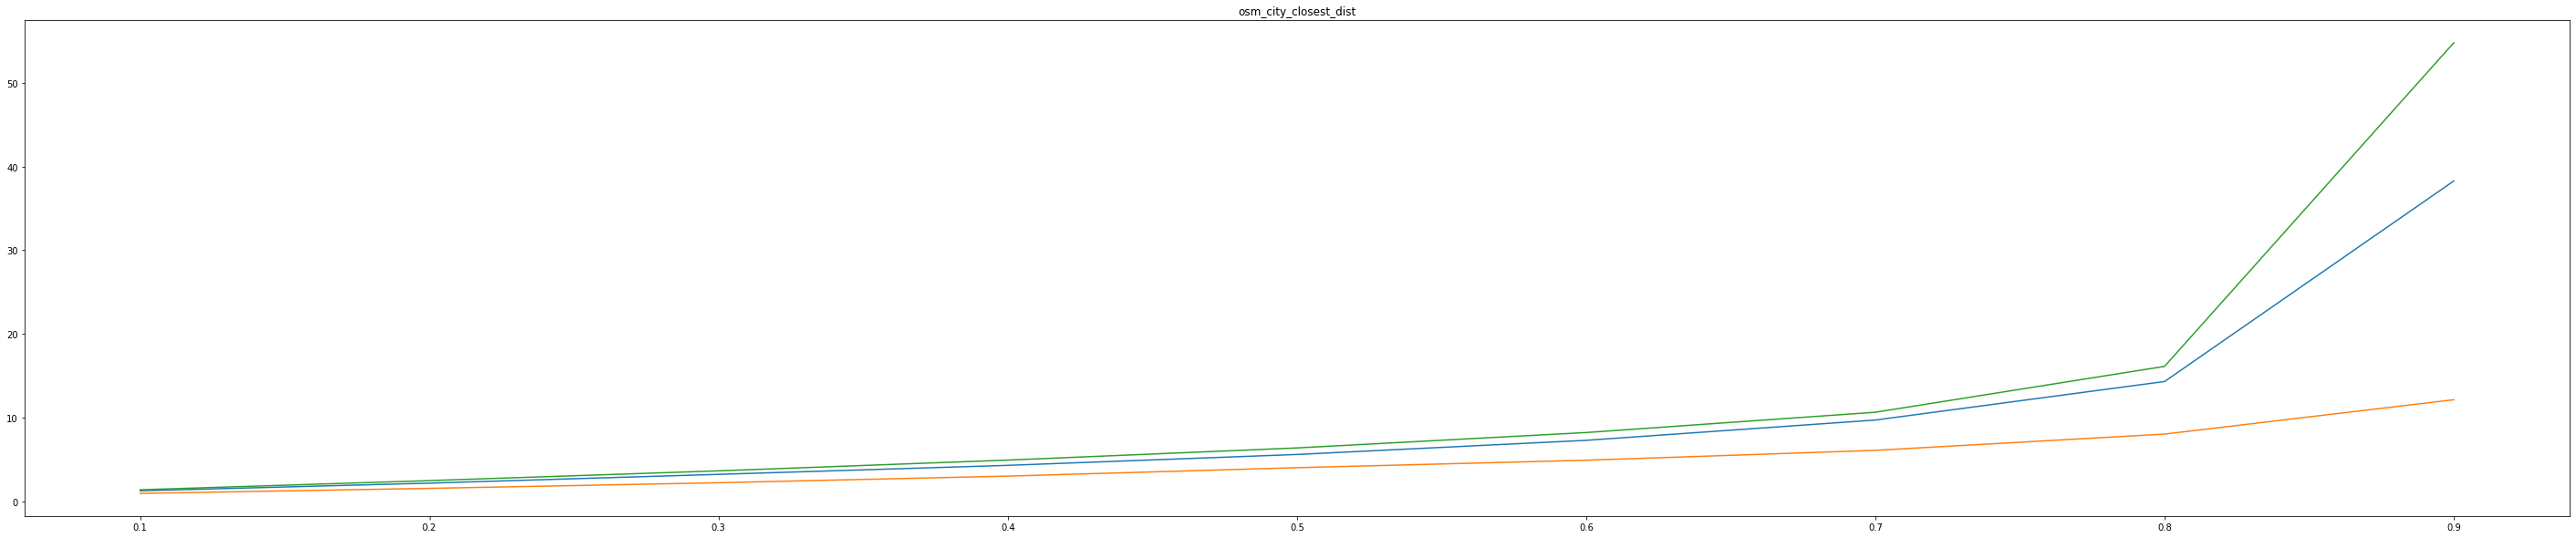

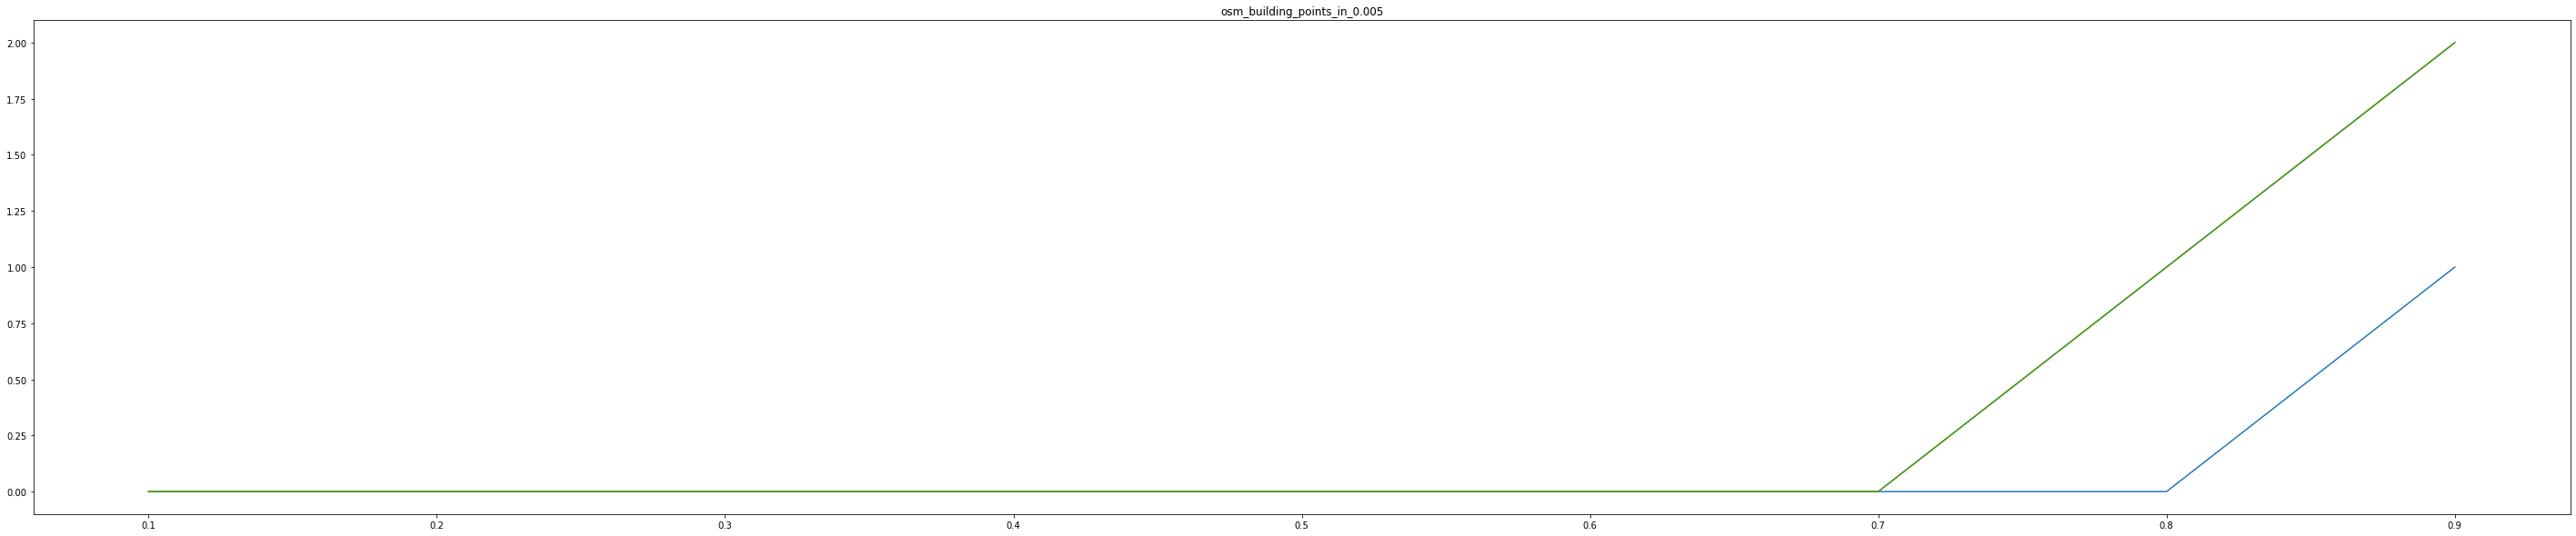

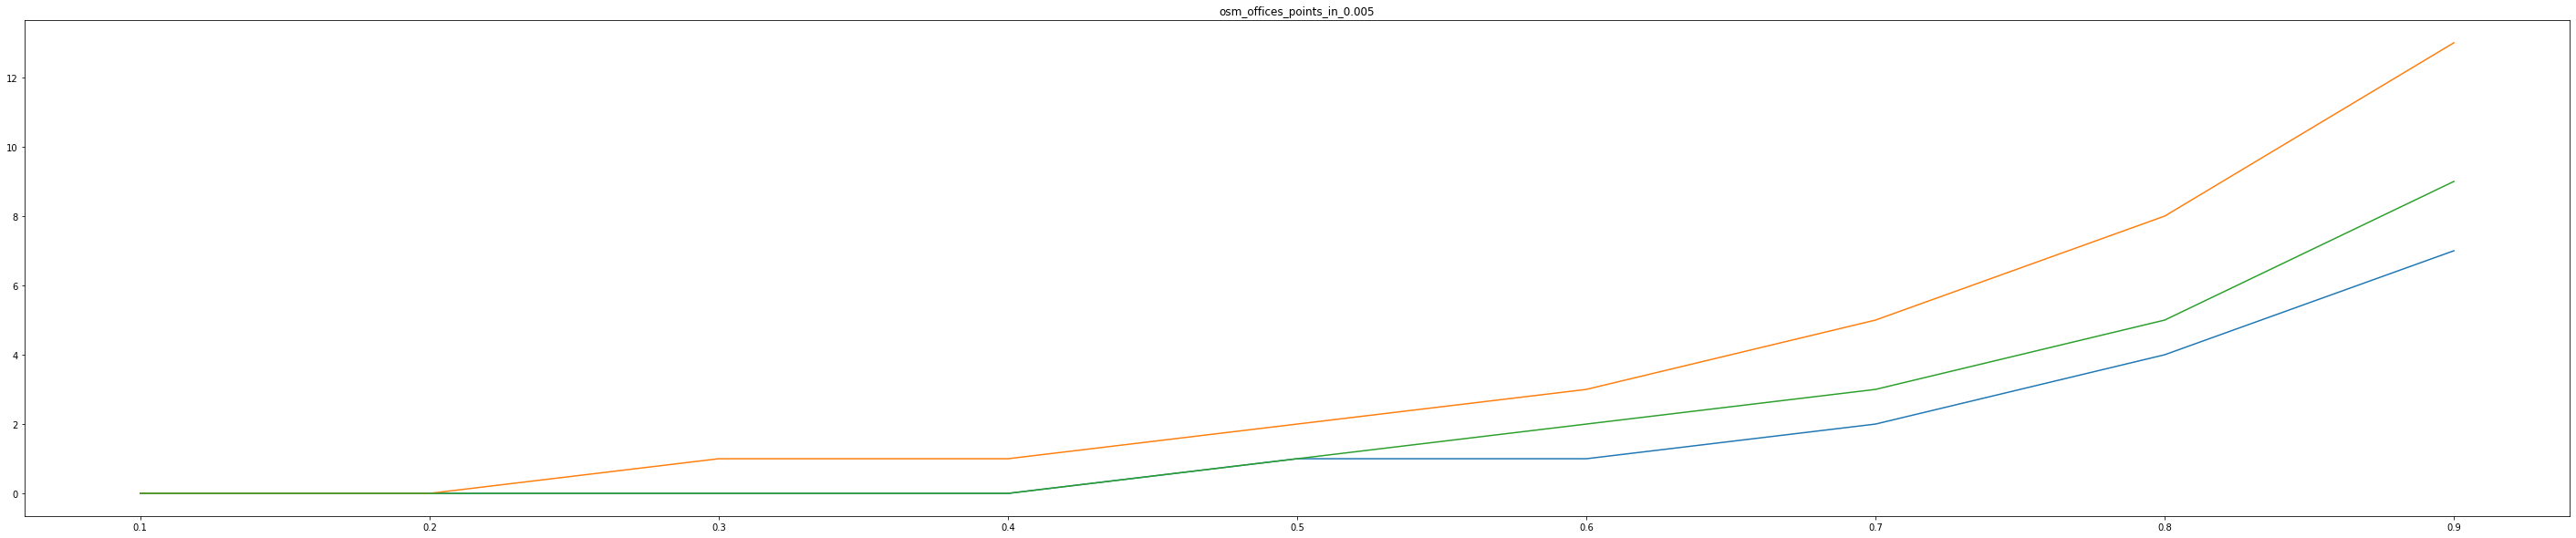

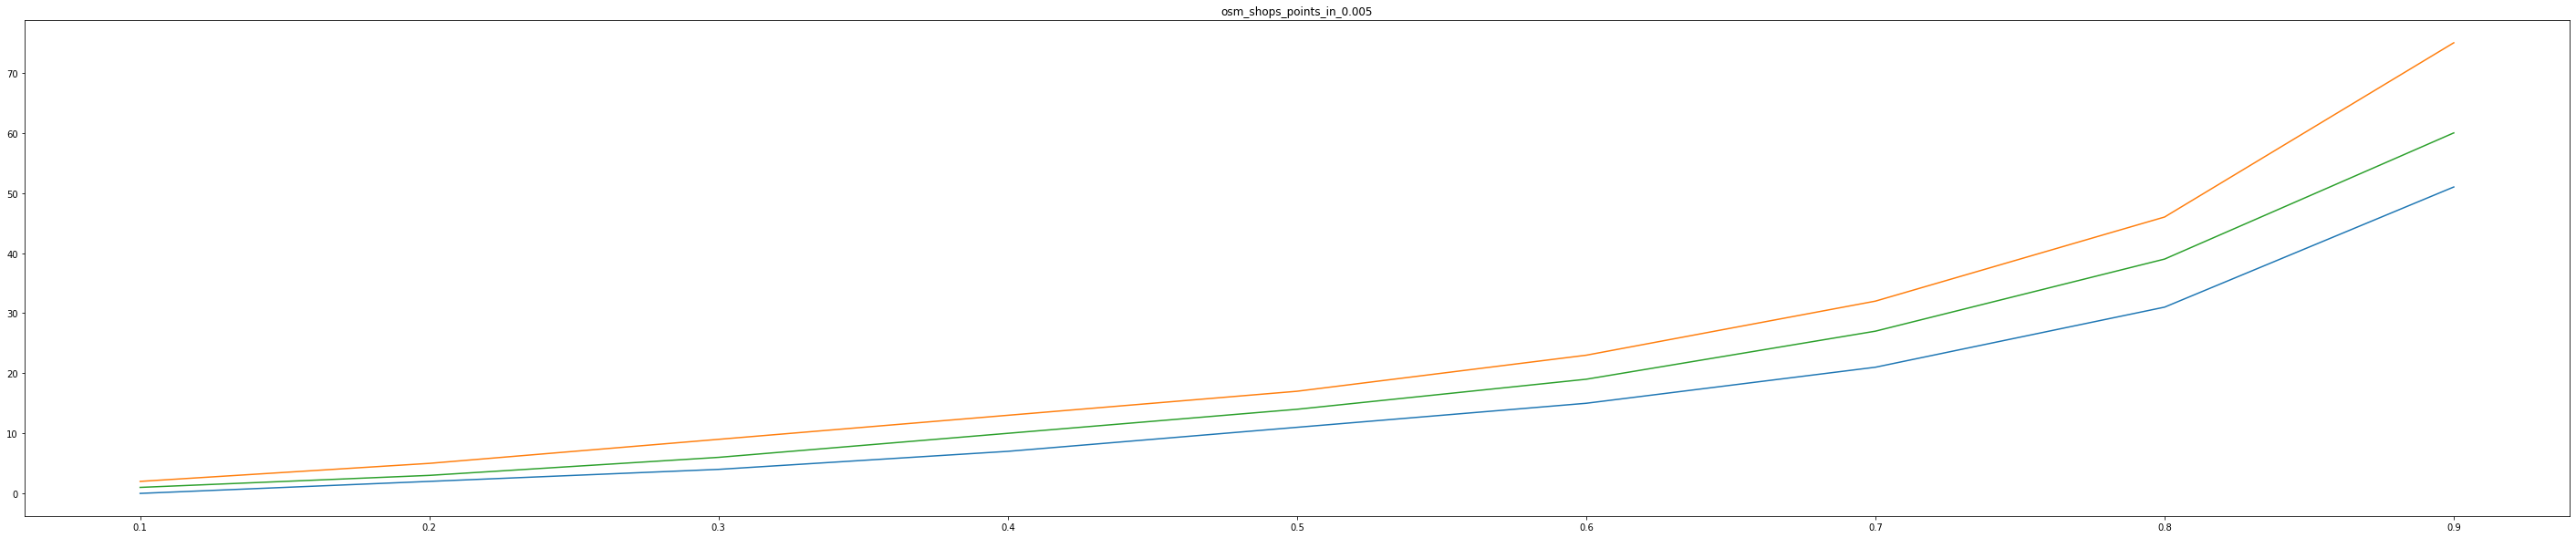

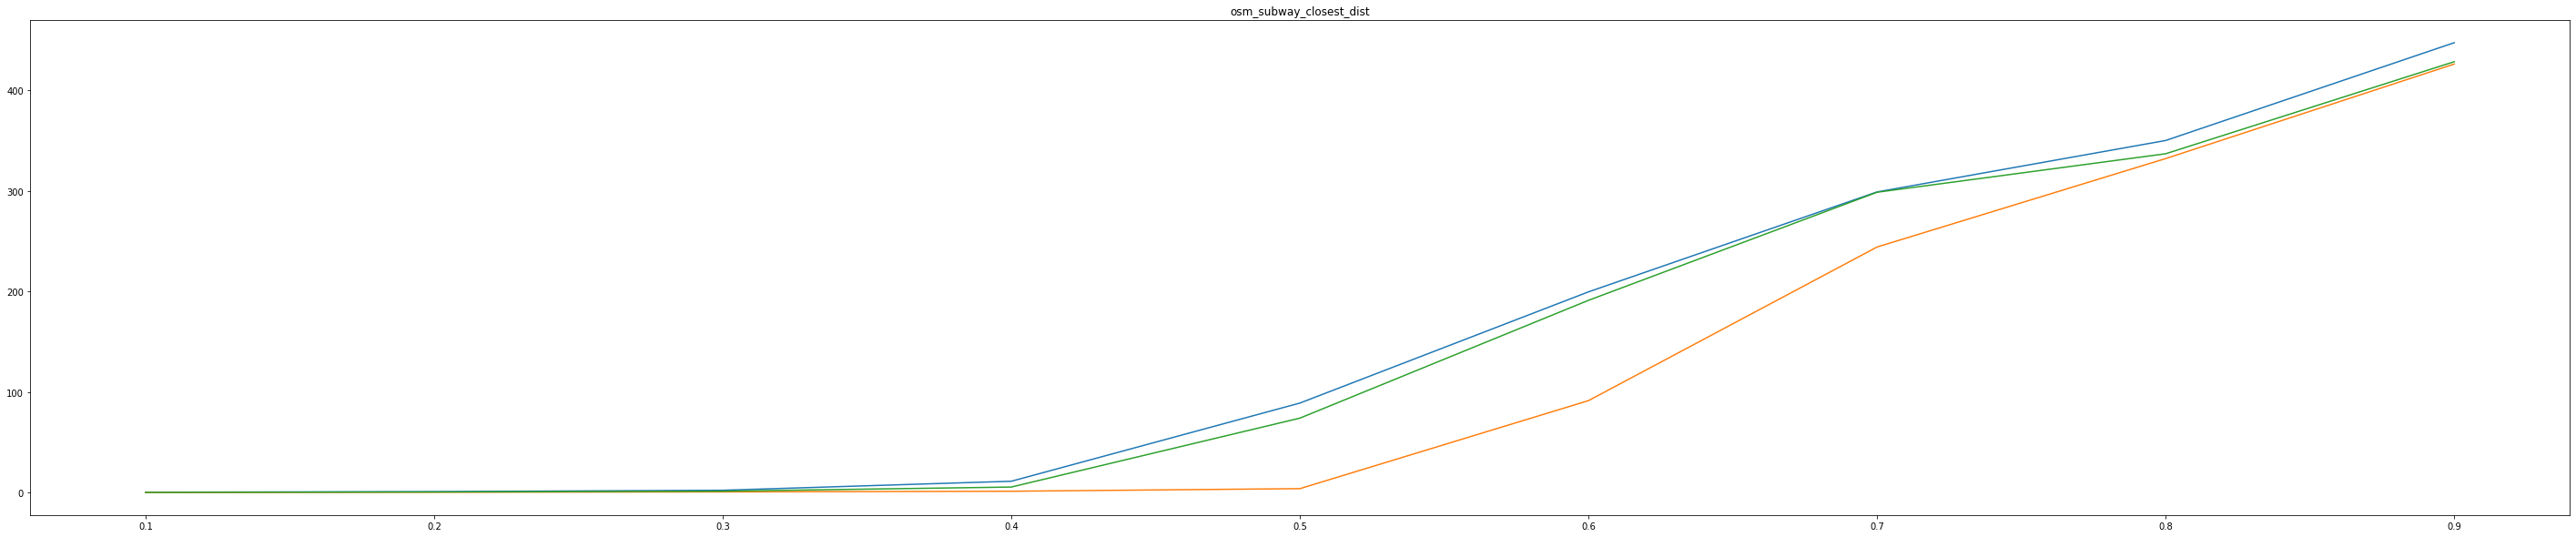

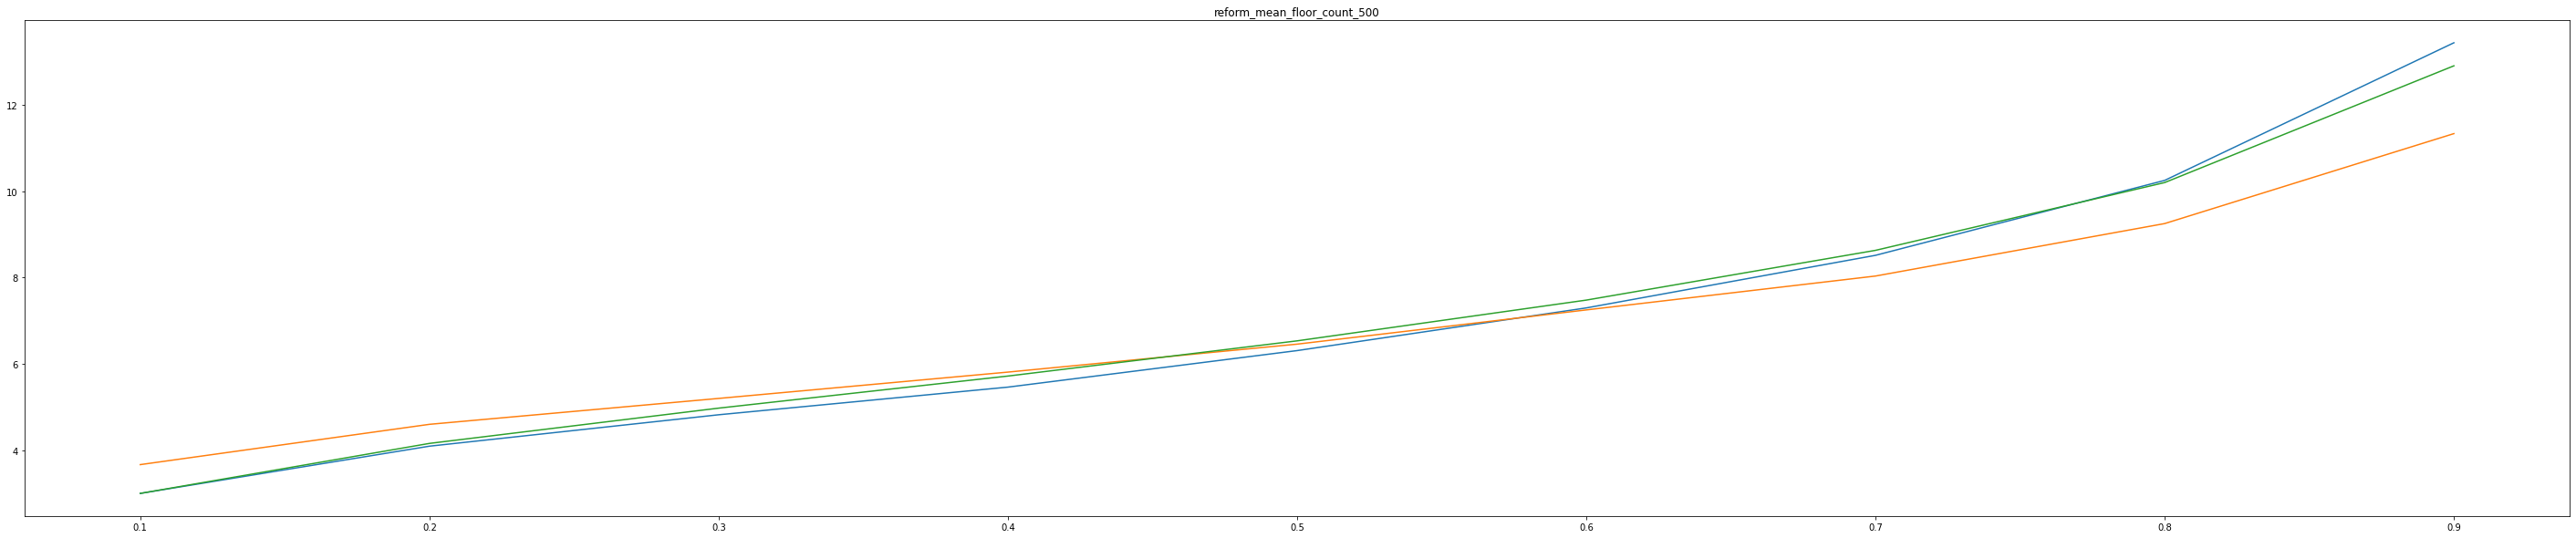

In [55]:
for param in ['total_square', 'osm_city_closest_dist', 'osm_building_points_in_0.005', 'osm_offices_points_in_0.005', 'osm_shops_points_in_0.005', 'osm_subway_closest_dist',
              'reform_mean_floor_count_500']:
    ig, axs = plt.subplots(figsize=(50, 10))
    axs.set_title(param)
    axs.plot(df_train.groupby('realty_type')[param].quantile(np.linspace(.1, 1, 9, 0)).unstack().T)

### хз

In [56]:
### 

In [57]:
import geopandas as gpd
import numpy as np

import folium
from folium import Marker
from folium.plugins import HeatMap
from branca.colormap import linear

import geopandas as gpd
from geopandas.tools import geocode

In [58]:
rus_bnd_gdf = gpd.read_file('input/geo.json')

In [59]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='2500px')

In [60]:
df_train[(df_train['lng'] > 23.) & (df_train['lng'] < 40.) & (df_train['lat'] > 45.) & (df_train['lat'] < 50.)]['city'].value_counts()

Краснодар                                                             12390
Ростов-на-Дону                                                         4645
Таганрог                                                                578
Батайск                                                                 247
Ейск                                                                    240
Аксай                                                                   234
Азов                                                                    176
Славянск-на-Кубани                                                      141
Тимашевск                                                               136
Гуково                                                                  128
Темрюк                                                                   93
Новошахтинск                                                             93
Каневская                                                                75
Приморско-Ах

In [61]:
m_2 = folium.Map(
    location=[55.7522, 37.6220],
    tiles='Stamen Toner',
    zoom_start=10
)

HeatMap(df_train[['lat', 'lng']], radius=7).add_to(m_2)
    
embed_map(m_2, 'm_2.html')

In [62]:
df_msk = df_train[df_train.city == 'Санкт-Петербург'].reset_index()
# df_msk = df_train

colors = {10: 'red',
 100: 'green',
 110: 'pink'}

m_2 = folium.Map(
    location=[55.7522, 37.6220],
    tiles='Stamen Toner',
    zoom_start=10
)

for i in range(10000):
    folium.Circle(
        radius=50,
        location=[df_msk.lat[i], df_msk.lng[i]],
        popup=df_msk.id[i],
        color=colors[df_msk.realty_type[i]],
        fill=True,
    ).add_to(m_2)

    
embed_map(m_2, 'm_2.html')

скорее всего зеленый(100) это офисы  
розовый(110) это торговля  
красный(10) свободного назначения

In [22]:
pretand_dict = {
    '10':'свободного назначения',
    '100':'офис',
    '110':'торговля'
}
df_train['realty_type_pretend'] = df_train['realty_type'].apply(str).map(pretand_dict)

In [23]:
[col for col in df_train.columns if 'bool' in col]

['reform_mean_year_building_1000_bool',
 'reform_count_of_houses_1000_bool_m10',
 'total_square_bool']

In [95]:
df_train[df_train['per_square_meter_price_bool'] != False].drop(columns=['per_square_meter_price_bool',
                                                                                       'reform_mean_year_building_1000_bool',
                                                                                       'reform_count_of_houses_1000_bool_m10',
                                                                                       ]).to_csv('/Users/a19028558/Desktop/Ralf_Hack/price_clean.csv',
                                                                                                index=False)
# df_train[df_train['per_square_meter_price_bool'] != False].to_csv('/Users/a19028558/Desktop/Ralf_Hack/price_clean.csv')
df_train[df_train['per_square_meter_price_bool'] == False].shape

(27980, 82)

In [33]:
filt2 = (df_train['per_square_meter_price_bool'] != False) & (df_train['reform_mean_year_building_1000_bool'] != False)
df_train[filt2].drop(columns=['per_square_meter_price_bool',
                                           'reform_mean_year_building_1000_bool',
                                           'reform_count_of_houses_1000_bool_m10',
                                            ]).to_csv('/Users/a19028558/Desktop/Ralf_Hack/price_clean_building_year_clean.csv',
                                                    index=False)
# df_train[df_train['reform_mean_year_building_1000_bool'] != False].to_csv('/Users/a19028558/Desktop/Ralf_Hack/building_year_clean.csv')
df_train[filt2].shape

(241217, 81)

In [32]:
filt3 = (df_train['per_square_meter_price_bool'] != False)
filt6 = (df_train['reform_mean_year_building_1000_bool'] != False)
filt7 = (df_train['reform_count_of_houses_1000_bool_m10'] != False)
df_train_copy = df_train[filt3 & filt6 & filt7]

df_train_copy.drop(columns=['per_square_meter_price_bool',
                                           'reform_mean_year_building_1000_bool',
                                           'reform_count_of_houses_1000_bool_m10'
                                            ], inplace=True)
df_train_copy.to_csv('/Users/a19028558/Desktop/Ralf_Hack/price_clean_building_year_clean_1000_meter_clean.csv',
                                                    index=False)
# df_train[df_train['reform_count_of_houses_1000_bool_m10'] != False].to_csv('/Users/a19028558/Desktop/Ralf_Hack/1000_meter_clean.csv')
df_train[filt3].shape

/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(251812, 81)

In [33]:
filt4 = (df_train['reform_mean_year_building_1000_bool'] != False) 
filt5 = (df_train['reform_count_of_houses_1000_bool_m10'] != False)
df_train_copy = df_train[filt4 & filt5]
df_train_copy.drop(columns=['per_square_meter_price_bool',
                                           'reform_mean_year_building_1000_bool',
                                           'reform_count_of_houses_1000_bool_m10'
                                            ], inplace=True)
df_train_copy.to_csv('/Users/a19028558/Desktop/Ralf_Hack/building_year_clean_1000_meter_clean.csv',index=False)
df_train.shape

/Users/a19028558/Desktop/Ralf_Hack/venv/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(279792, 81)

In [91]:
df_train[~filt].to_csv('/Users/a19028558/Desktop/Ralf_Hack/aggregated_clean.csv')
df_train[~filt].shape

(279778, 82)